<!--
# Machine Learning with Tree-Based Models in Python

> " understand the advantages and shortcomings of trees and demonstrate how ensembling can alleviate these shortcomings, all while exploring on real-world datasets."

- author: Victor Omondi
- toc: true
- comments: true
- categories: [machine-learning, tree-based-models, boosting]
- image: images/ml-tree-shield.png
-->

# Overview

Decision trees are supervised learning models used for problems involving **classification and regression**. 

Tree models present a high flexibility that comes at a price: on one hand, trees are able to **capture complex non-linear** relationships; on the other hand, they are prone to memorizing the noise present in a dataset. 

By aggregating the predictions of trees that are trained differently, ensemble methods take advantage of the flexibility of trees while reducing their tendency to memorize noise. 

Ensemble methods are used across a variety of fields and have a proven track record of winning many machine learning competitions. 

We'll explore how to use Python to train decision trees and tree-based models with the user-friendly scikit-learn machine learning library. we'll understand the advantages and shortcomings of trees and demonstrate how ensembling can alleviate these shortcomings.


Finally, We'll also understand how to tune the most influential hyperparameters in order to get the most out of your models.

- **Chap 1**: Classication And Regression Tree (CART)
- **Chap 2**: The Bias-Variance Tradeoff
- **Chap 3**: Bagging and Random Forests
- **Chap 4**: Boosting
- **Chap 5**: Model Tuning


# Libraries

In [133]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
%matplotlib inline

from sklearn.tree import (DecisionTreeClassifier, 
                          DecisionTreeRegressor)
from sklearn.model_selection import (train_test_split, 
                                     cross_val_score, 
                                     GridSearchCV)
from sklearn.metrics import (accuracy_score, 
                             mean_squared_error as MSE, 
                             roc_auc_score)
from sklearn.linear_model import (LogisticRegression, 
                                  LinearRegression)
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import (VotingClassifier,
                              BaggingClassifier, 
                              RandomForestRegressor, 
                              AdaBoostClassifier, 
                              GradientBoostingRegressor)

import warnings
warnings.filterwarnings("ignore", message="lbfgs failed to converge")
warnings.filterwarnings("ignore", message="A column-vector y was passed")


sns.set()

# Classification and Regression Trees

Classification and Regression Trees (CART) are a set of supervised learning models used for problems involving classification and regression. In this chapter, we'll be exploring the CART algorithm.



## Decision tree for classification

> ### Classication-tree
- Sequence of if-else questions about individual features.
- **Objective**: infer class labels.
- Able to capture non-linear relationships between features and labels.
- Don't require feature scaling (ex: Standardization, ..)

> ### Breast Cancer Dataset in 2D

In [2]:
wbc = pd.read_csv("datasets/wbc.csv")
wbc.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

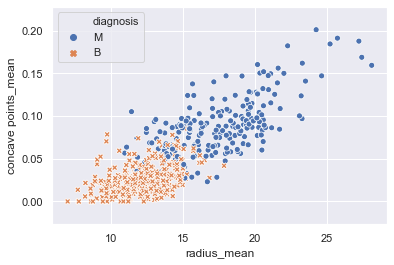

In [3]:
_ = sns.scatterplot(data=wbc, x="radius_mean", y="concave points_mean", hue="diagnosis", style="diagnosis")
plt.show()

> ### Decision-tree Diagram
![image.png](datasets/decision-tree-diagram.png)

**Maximum Depth** = The maximum number of branches separating the top from an extreme-end is known as the maximum depth which is equal to 2 here.


> ### Decision Regions
- **Decision region**: region in the feature space where all instances are assigned to one class label.
- **Decision Boundary**: surface separating different decision regions.
![image.png](datasets/decision-region.png)


> ### Decision Regions: CART vs. Linear Model
![image.png](datasets/CART-vs-linear-model.png)

### Train the first classification tree

We'll work with the [**Wisconsin Breast Cancer Dataset**](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data) from the UCI machine learning repository. We'll predict whether a tumor is malignant or benign based on two features: the mean radius of the tumor (`radius_mean`) and its mean number of concave points (`concave points_mean`).

In [4]:
X_wbc = wbc[["radius_mean", "concave points_mean"]]
y_wbc = wbc.diagnosis
y_wbc = y_wbc.map({'B':0, 'M':1})

X_train_wbc, X_test_wbc, y_train_wbc, y_test_wbc = train_test_split(X_wbc, y_wbc, 
                                                                    test_size=.2, 
                                                                    random_state=1, 
                                                                    stratify=y_wbc)

The dataset is already loaded in the workspace and is split into 80% train and 20% test. The feature matrices are assigned to `X_train_wbc` and `X_test_wbc`, while the arrays of labels are assigned to `y_train_wbc` and `y_test_wbc` where class 1 corresponds to a malignant tumor and class 0 corresponds to a benign tumor. To obtain reproducible results, we'll also defined a variable called `SEED_wbc` which is set to 1.

In [5]:
SEED_wbc = 1

In [6]:
# Instantiate a DecisionTreeClassifier 'dt_wbc' with a maximum depth of 6
dt_wbc = DecisionTreeClassifier(max_depth=6, random_state=SEED_wbc)

# Fit dt to the training set
dt_wbc.fit(X_train_wbc, y_train_wbc)

# Predict test set labels
y_pred_wbc = dt_wbc.predict(X_test_wbc)
y_pred_wbc[0:5]


array([0, 0, 0, 1, 0], dtype=int64)

### Evaluate the classification tree

Now that we've fit the first classification tree, it's time to evaluate its performance on the test set. we'll do so using the accuracy metric which corresponds to the fraction of correct predictions made on the test set.

In [7]:
# Compute test set accuracy  
acc_wbc = accuracy_score(y_test_wbc, y_pred_wbc)
print("Test set accuracy: {:.2f}".format(acc_wbc))

Test set accuracy: 0.89


Using only two features, the tree was able to achieve an accuracy of 89%!

### Logistic regression vs classification tree

A classification tree divides the feature space into rectangular regions. In contrast, a linear model such as logistic regression produces only a single linear decision boundary dividing the feature space into two decision regions.

In [8]:
def plot_labeled_decision_regions(X,y, models):    
    '''
    Function producing a scatter plot of the instances contained 
    in the 2D dataset (X,y) along with the decision 
    regions of two trained classification models contained in the
    list 'models'.
            
    Parameters
    ----------
    X: pandas DataFrame corresponding to two numerical features 
    y: pandas Series corresponding the class labels
    models: list containing two trained classifiers 
    
    '''
    if len(models) != 2:
        raise Exception('''
        Models should be a list containing only two trained classifiers.
        ''')
    if not isinstance(X, pd.DataFrame):
        raise Exception('''
        X has to be a pandas DataFrame with two numerical features.
        ''')
    if not isinstance(y, pd.Series):
        raise Exception('''
        y has to be a pandas Series corresponding to the labels.
        ''')
    fig, ax = plt.subplots(1, 2, figsize=(6.0,2.7), sharey=True)
    for i, model in enumerate(models):
        plot_decision_regions(X.values,y.values, model, legend= 2, ax = ax[i])
        ax[i].set_title(model.__class__.__name__)
        ax[i].set_xlabel(X.columns[0])
        if i == 0:
            ax[i].set_ylabel(X.columns[1])
        ax[i].set_ylim(X.values[:,1].min(), X.values[:,1].max())
        ax[i].set_xlim(X.values[:,0].min(), X.values[:,0].max())
    plt.tight_layout()
    plt.show()

`plot_labeled_decision_regions()` that can be used to plot the decision regions of a list containing two trained classifiers.

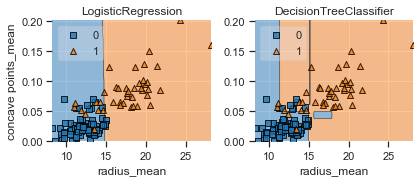

In [9]:
# Instatiate logreg_wbc
logreg_wbc = LogisticRegression(random_state=1)

# Fit logreg to the training set
logreg_wbc.fit(X_train_wbc, y_train_wbc)

# Define a list called clfs containing the two classifiers logreg and dt
clfs_wbc = [logreg_wbc, dt_wbc]

# Review the decision regions of the two classifiers
plot_labeled_decision_regions(X_test_wbc, y_test_wbc, clfs_wbc)

> Note: decision boundary produced by logistic regression is linear while the boundaries produced by the classification tree divide the feature space into rectangular regions.

## Classification tree Learning

> ### Building Blocks of a Decision-Tree
- **Decision-Tree**: data structure consisting of a hierarchy of nodes.
- **Node**: question or prediction.
  - Three kinds of nodes:
    - **Root**: no parent node, question giving rise to two children nodes.
    - **Internal node**: one parent node, question giving rise to two children nodes.
    - **Leaf**: one parent node, no children nodes --> prediction.

> ### Prediction
![image.png](datasets/decision-tree-bb.png)


> ### Information Gain (IG)
$$
IG(\underbrace{f}_{feature}, \underbrace{{sp}}_{split\_point})=I(parent)-(\frac{N_{left}}{N}I(left)+\frac{N_{right}}{N}I(right))
$$
- Criteria to measure the impurity of a node I(node):
  - gini index,
  - entropy. ...

![image.png](datasets/decision-tree-ig.png)

> ### Classication-Tree Learning
- Nodes are grown recursively.
- At each node, split the data based on:
  - feature $f$ and split-point $sp$ to maximize IG(node).
  - If IG(node)= 0, declare the node a leaf..
 
 
 **Remember** : these rules are for unconstrained trees. If you constrain the maximum depth of a tree to 2 for example, all nodes having a depth of 2 will be declared leafs even if the information gain obtained by splitting such nodes is not null.

### Growing a classification tree

The growth of an unconstrained classification tree follows a few simple rules:
- The existence of a node depends on the state of its predecessors.
- The impurity of a node can be determined using different criteria such as **entropy** and the **gini-index**.
- When the information gain resulting from splitting a node is null, the node is declared as a leaf.


> Important: splitting an internal node always involves maximizing information gain!

In [10]:
dt_gini_wbc = DecisionTreeClassifier(criterion="gini", random_state=1)


dt_gini_wbc.fit(X_train_wbc, y_train_wbc)
y_gini_pred_wbc = dt_gini_wbc.predict(X_test_wbc)
y_gini_pred_wbc[:5]



array([1, 0, 0, 1, 0], dtype=int64)

In [11]:
accuracy_score(y_test_wbc, y_gini_pred_wbc)

0.9210526315789473

### Using entropy as a criterion

We'll train a classification tree on the Wisconsin Breast Cancer dataset using entropy as an information criterion. We'll do so using all the 30 features in the dataset, which is split into 80% train and 20% test.

In [12]:
wbc.shape

(569, 33)

In [13]:
X_all_wbc = wbc[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
X_train_all_wbc, X_test_all_wbc, y_train_all_wbc, y_test_all_wbc = train_test_split(
    X_all_wbc, y_wbc, test_size=.2, stratify=y_wbc, random_state=1
)

In [14]:
# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy_wbc = DecisionTreeClassifier(criterion="entropy", max_depth=8, random_state=1)

# Fit dt_entropy to the training set
dt_entropy_wbc.fit(X_train_all_wbc, y_train_all_wbc)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=1)

In [15]:
dt_gini_wbc = DecisionTreeClassifier(criterion="gini", 
                                     max_depth=8, 
                                     random_state=1)

dt_gini_wbc.fit(X_train_all_wbc, y_train_all_wbc)



DecisionTreeClassifier(max_depth=8, random_state=1)

### Entropy vs Gini index

We'll compare the test set accuracy of `dt_entropy_wbc` to the accuracy of another tree named `dt_gini_wbc`. The tree `dt_gini_wbc` was trained on the same dataset using the same parameters except for the information criterion which was set to the gini index using the keyword `'gini'`.

In [16]:
y_pred_gini_wbc = dt_gini_wbc.predict(X_test_all_wbc)
y_pred_gini_wbc[:5]

array([1, 0, 0, 1, 0], dtype=int64)

In [17]:
y_pred_entropy_wbc = dt_entropy_wbc.predict(X_test_all_wbc)
y_pred_entropy_wbc[:5]

array([1, 0, 0, 1, 0], dtype=int64)

In [18]:
acc_entropy_wbc = accuracy_score(y_test_all_wbc, y_pred_entropy_wbc)
acc_entropy_wbc

0.9298245614035088

In [19]:
acc_gini_wbc = accuracy_score(y_test_all_wbc, y_pred_gini_wbc)
acc_gini_wbc

0.9298245614035088

> Note: the two models achieve exactly the same accuracy. Most of the time, the gini index and entropy lead to the same results. The gini index is slightly faster to compute and is the default criterion used in the `DecisionTreeClassifier` model of scikit-learn.

## Decision tree for regression


> ### Auto-mpg Dataset


In [20]:
auto = pd.read_csv("datasets/auto.csv")
auto.head()

mpg  displ   hp  weight  accel  origin  size
0  18.0  250.0   88    3139   14.5      US  15.0
1   9.0  304.0  193    4732   18.5      US  20.0
2  36.1   91.0   60    1800   16.4    Asia  10.0
3  18.5  250.0   98    3525   19.0      US  15.0
4  34.3   97.0   78    2188   15.8  Europe  10.0

> ### Auto-mpg with one feature


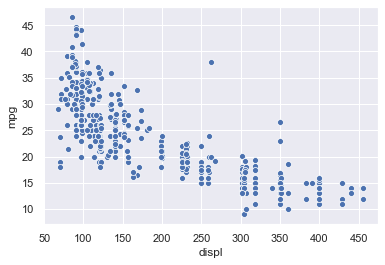

In [21]:
_ = sns.scatterplot(data=auto, x="displ", y="mpg")
plt.show()

> ### Information Criterion for Regression-Tree
$$
I(node) = \underbrace{MSE(node)}_{mean\_squared\_error} = \frac{1}{N_{node}}\sum_{i\in{node}}(y^i-\hat{y}_{node})^2
$$
$$
\underbrace{\hat{y}_{node}}_{mean\_squared\_error} = \frac{1}{N_{node}}\sum_{i\in{node}}y^i
$$

> ### Prediction
$$
\hat{y}({leaf}) =  \frac{1}{N_{leaf}}\sum_{i\in{leaf}}y^i
$$

In [6]:
X_displ_auto = auto.displ.values.reshape(-1,1)
y_mpg_auto = auto.mpg.values.reshape(-1,1)

X_train_displ_auto, X_test_displ_auto, y_train_auto, y_test_auto, = train_test_split(
    X_displ_auto, y_mpg_auto, test_size=.2, random_state=3
) 

dt_auto = DecisionTreeRegressor(max_depth=4, min_samples_leaf=.1, random_state=3)

NameError: name 'auto' is not defined

In [23]:
dt_auto.fit(X_train_displ_auto, y_train_auto)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.1, random_state=3)

In [24]:
y_pred_auto = dt_auto.predict(X_test_displ_auto)
y_pred_auto[:5]

array([26.22439024, 32.98780488, 15.06470588, 32.98780488, 32.98780488])

In [25]:
mse_dt_auto = MSE(y_test_auto, y_pred_auto)
rmse_dt_auto = mse_dt_auto**(1/2)
rmse_dt_auto

5.102306888903137

### Train your first regression tree
We'll train a regression tree to predict the mpg (miles per gallon) consumption of cars in the auto-mpg dataset using all the six available features.

In [26]:
auto.shape

(392, 7)

In [27]:
auto.head()

mpg  displ   hp  weight  accel  origin  size
0  18.0  250.0   88    3139   14.5      US  15.0
1   9.0  304.0  193    4732   18.5      US  20.0
2  36.1   91.0   60    1800   16.4    Asia  10.0
3  18.5  250.0   98    3525   19.0      US  15.0
4  34.3   97.0   78    2188   15.8  Europe  10.0

In [28]:
auto.origin.unique()

array(['US', 'Asia', 'Europe'], dtype=object)

In [29]:
auto2 = pd.get_dummies(auto)
auto2.head()

mpg  displ   hp  weight  accel  size  origin_Asia  origin_Europe  \
0  18.0  250.0   88    3139   14.5  15.0            0              0   
1   9.0  304.0  193    4732   18.5  20.0            0              0   
2  36.1   91.0   60    1800   16.4  10.0            1              0   
3  18.5  250.0   98    3525   19.0  15.0            0              0   
4  34.3   97.0   78    2188   15.8  10.0            0              1   

   origin_US  
0          1  
1          1  
2          0  
3          1  
4          0

In [30]:
X_all_auto = auto2.drop("mpg", axis=1)
X_train_all_auto, X_test_all_auto, y_train_all_auto, y_test_all_auto = train_test_split(
    X_all_auto, y_mpg_auto, test_size=.2, random_state=3)

In [31]:
# Instantiate dt
dt_all_auto = DecisionTreeRegressor(max_depth=8,
             min_samples_leaf=.13,
            random_state=3)

# Fit dt to the training set
dt_all_auto.fit(X_train_all_auto, y_train_all_auto)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

### Evaluate the regression tree

We will evaluate the test set performance of `dt_all_auto` using the Root Mean Squared Error (RMSE) metric. The RMSE of a model measures, on average, how much the model's predictions differ from the actual labels. The RMSE of a model can be obtained by computing the square root of the model's Mean Squared Error (MSE).

In [32]:
# Compute y_pred
y_pred_all_auto = dt_all_auto.predict(X_test_all_auto)

# Compute mse_dt
mse_dt_auto = MSE(y_test_all_auto, y_pred_all_auto)

# Compute rmse_dt
rmse_dt_auto = mse_dt_auto**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt_auto))

Test set RMSE of dt: 4.37


### Linear regression vs regression tree
We'll compare the test set RMSE of dt to that achieved by a linear regression model. 

In [33]:
lr_auto = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
lr_auto.fit(X_train_all_auto, y_train_all_auto)

LinearRegression(n_jobs=1)

In [35]:
# Predict test set labels 
y_pred_lr_auto = lr_auto.predict(X_test_all_auto)

# Compute mse_lr
mse_lr_auto = MSE(y_test_all_auto, y_pred_lr_auto)

# Compute rmse_lr
rmse_lr_auto = mse_lr_auto**(1/2)

# Print rmse_lr
print('Linear Regression test set RMSE: {:.2f}'.format(rmse_lr_auto))

# Print rmse_dt
print('Regression Tree test set RMSE: {:.2f}'.format(rmse_dt_auto))

Linear Regression test set RMSE: 5.10
Regression Tree test set RMSE: 4.37


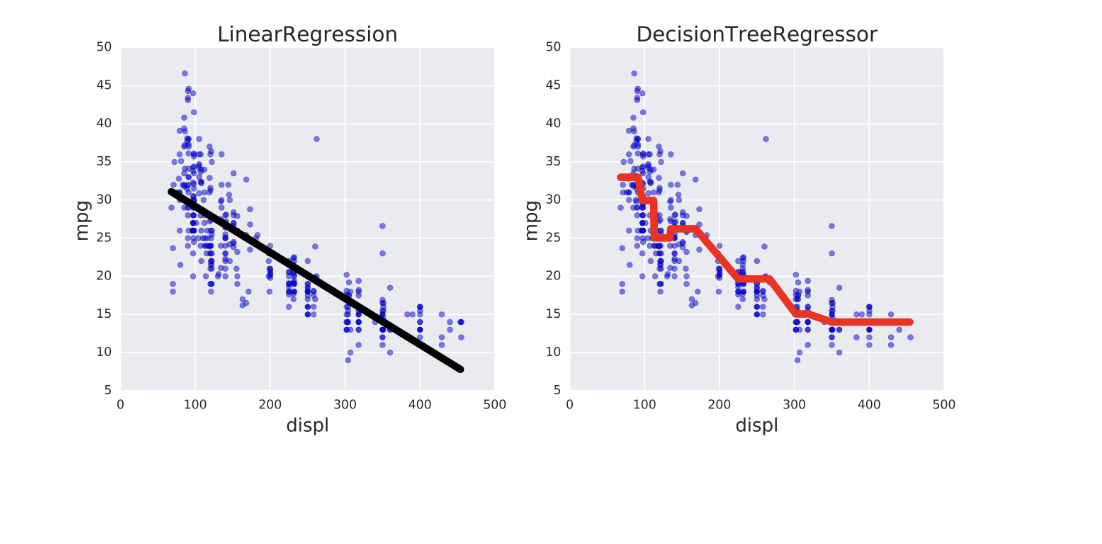

# The Bias-Variance Tradeoff

The bias-variance tradeoff is one of the fundamental concepts in supervised machine learning. We'll explore how to diagnose the problems of **overfitting** and **underfitting**. We'll also be exploring the concept of ensembling where the predictions of several models are aggregated to produce predictions that are more robust.

## Generalization Error

> ### Supervised Learning - Under the Hood
- Supervised Learning:$y=f(x)$,   ($f$ is unknown).
>In supervised learning, you make the assumption that there's a mapping f between features and labels. You can express this as y=f(x). f which is shown in red here is an unknown function that you want to determine. 

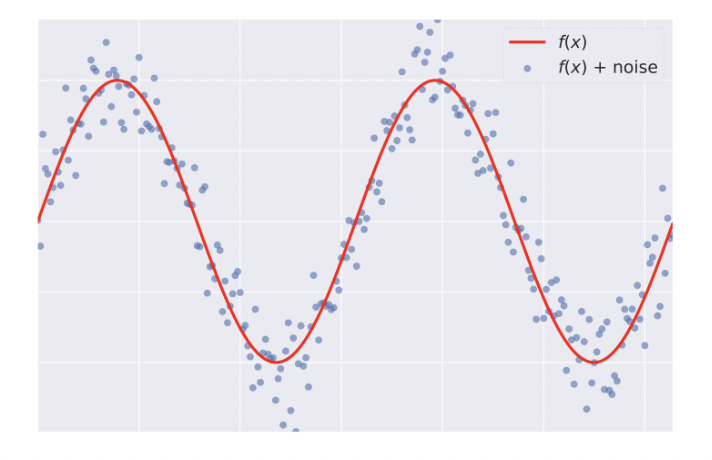



> ### Goals of Supervised Learning
- Find a model  $\hat{f}$ that best approximates $f$: $\hat{f}\approx f$ 
- $\hat{f}$ can be Logistic Regression, Decision Tree, Neural Network ...
- Discard noise as much as possible.
- **End goal**: $\hat{f}$ should acheive a low predictive error on unseen datasets

> ### Difficulties in Approximating $f$
- **Overtting**:$\hat{f}(x)$ fits the training set noise.
- **Undertting**: $\hat{f}$ is note flexible enough to approximate $f$.



Overtting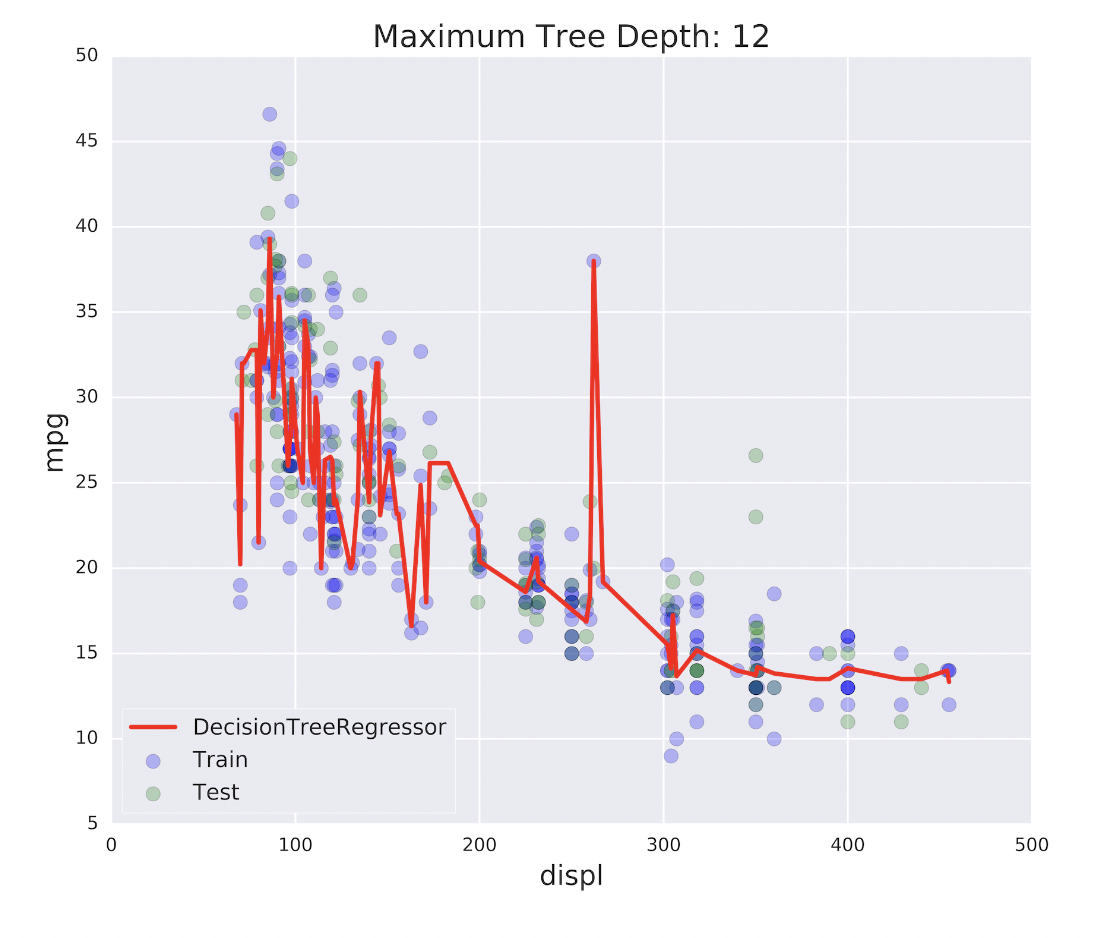



Undertting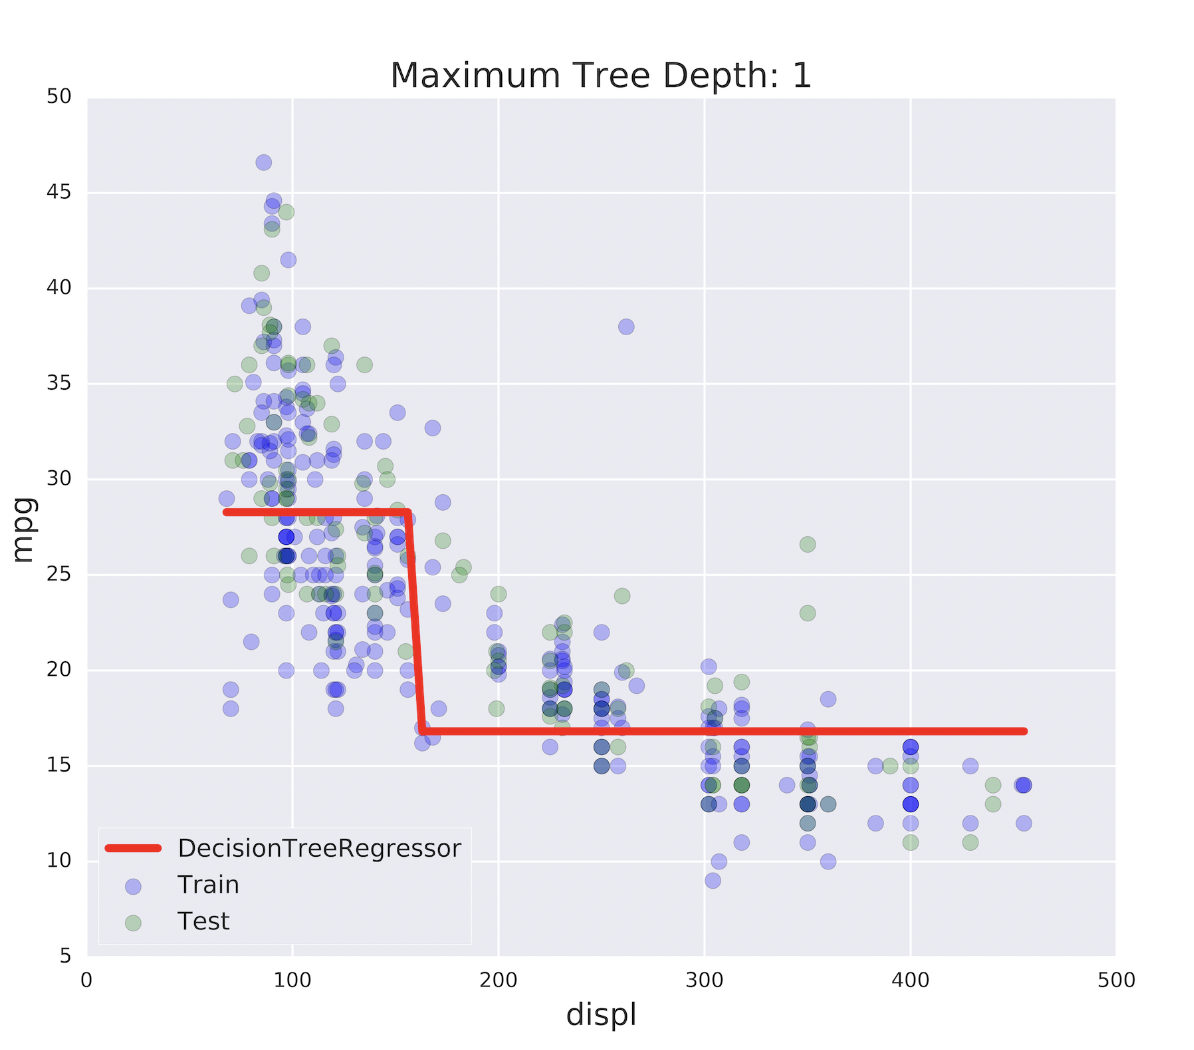



> ### Generalization Error
- **Generalization Error of $\hat{f}$**: Does $\hat{f}$ generalize well with unseen data?
- It can be decomposed as follows:Generalization Error of 

> ** $\hat{f} = {bias}^2 + variance$ + irruducible error **



> ### Bias
- **Bias**: error term that tells you, on average, how much $\hat{f} \neq f$
- The bias term tells you, on average, how much $\hat{f}$ and f are different



To illustrate this consider the high bias model shown here in black; this model is not flexible enough to approximate the true function f shown in red. 

**High bias models** lead to **underfitting.**

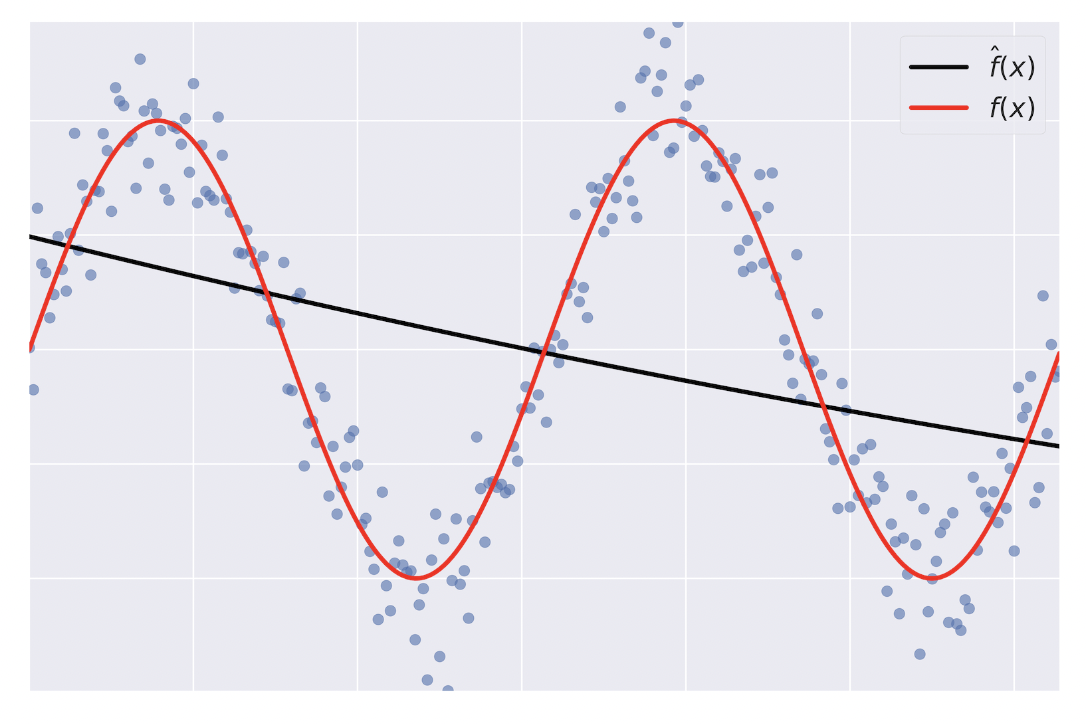

> ### Variance
- **Variance** tells you how much $\hat{f}$ is inconsistent over different training sets.
- **High variance model** shown here in black; in this case, $\hat{f}$ follows the training data points so closely that it misses the true function f shown in red. 

- **High variance models** lead to **overfitting**



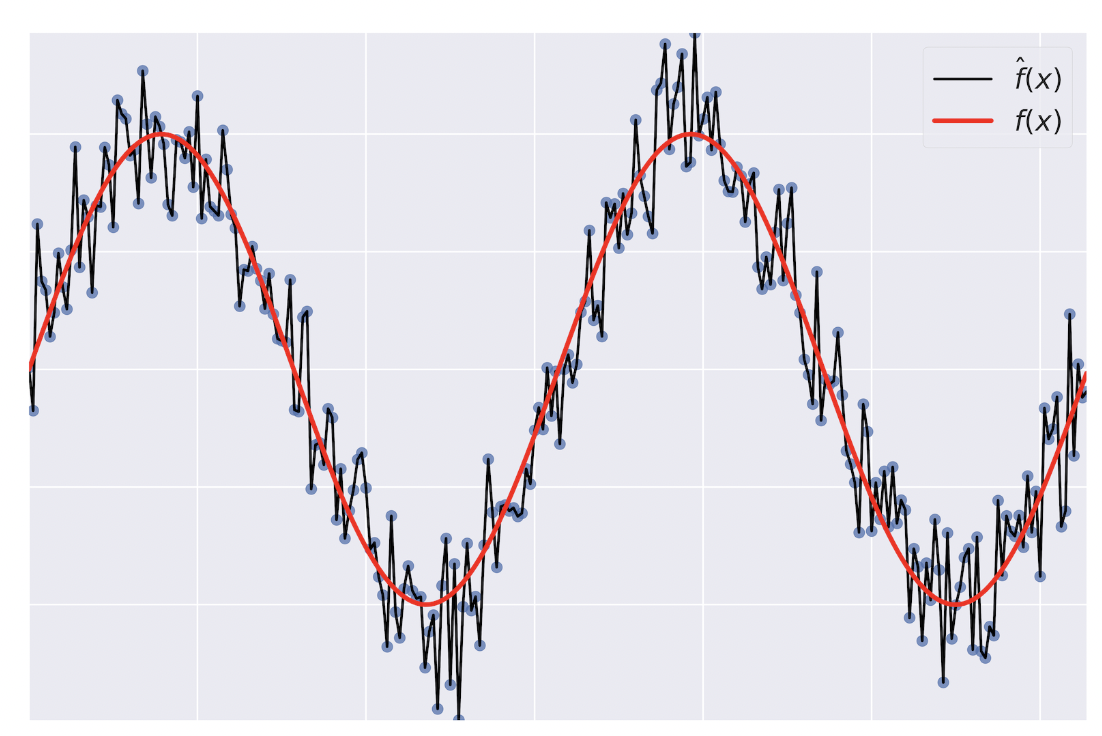

> ### Model Complexity
- **Model Complexity**: sets the flexibility of $\hat{f}$
- Example: Maximum tree depth, Minimum samples per leaf, ...

As the complexity of $\hat{f}$ (model) increases, the bias decreases while the variance increases.

**Bias-variance trade-off:** our goal is to find the model complexity that achieves the lowest generalization error. Since this error is the sum of three terms with the irreducible error being constant, you need to find a balance between bias and variance because as one increases the other decreases.

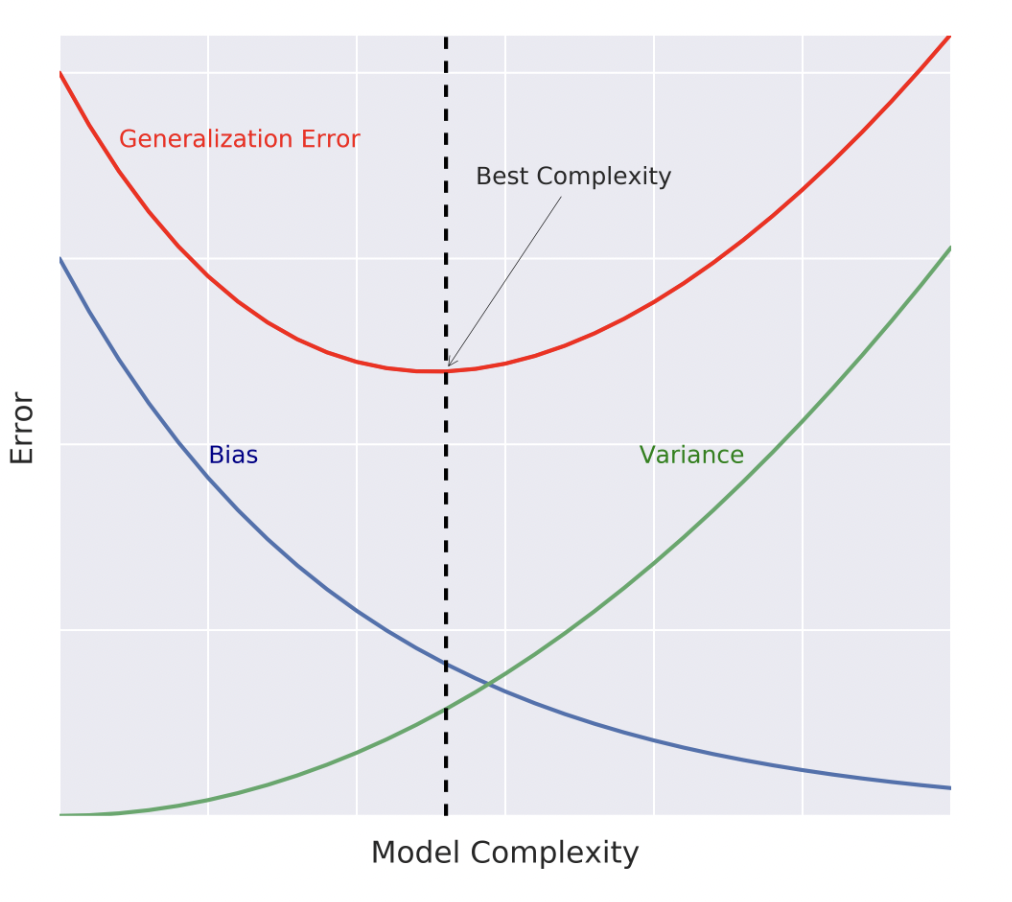

### Bias-Variance Tradeoff: A Visual Explanation
Visually, you can imagine approximating fhat as aiming at the center of a shooting-target where the center is the true function f. If fhat is low bias and low variance, your shots will be closely clustered around the center. If fhat is high variance and high bias, not only will your shots miss the target but they would also be spread all around the shooting target.

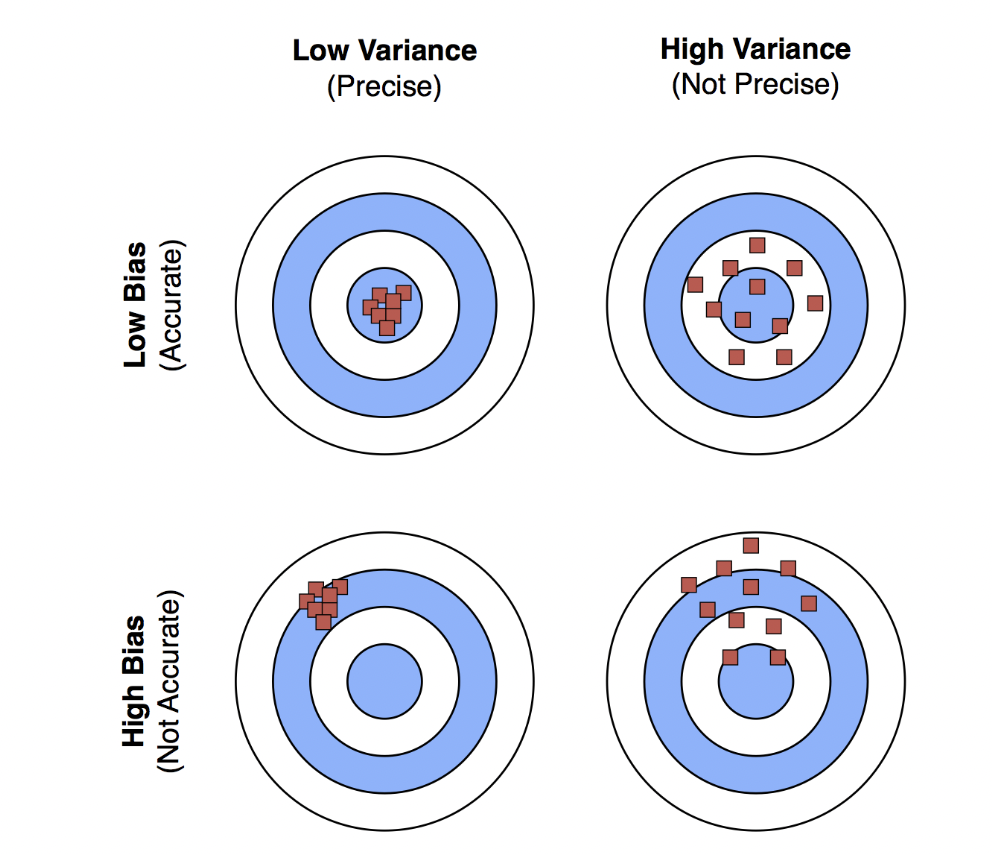


## Diagnose Bias and Variance problems

### Estimating the Generalization Error
- How do we estimate the generalization error of a model?
- Cannot be done directly because:
  - $f$ is unknown,
  - usually you only have one dataset,
  - noise is unpredictable.
- **Solution**:
  - split the data to training and test sets,
  - fit $\hat{f}$ to the training set,
  - evaluate the error of $\hat{f}$ on the **unseen** test set.
  - generalization error of $\hat{f} \approx$ test set error of $\hat{f}$.

> ### Better Model Evaluation with Cross-Validation
- Test set should not be touched until we are condent about $\hat{f}$'s perfomance
- Evaluating $\hat{f}$  on training set: biased estimate, $\hat{f}$ has already seen all training points.
- Solution $\longrightarrow$ Cross-Validation (CV):
  - K-Fold CV,
  - Hold-Out CV.
  
> ### K-Fold CV
$CV error = \frac{E_1+...+E_{10}}{10}$
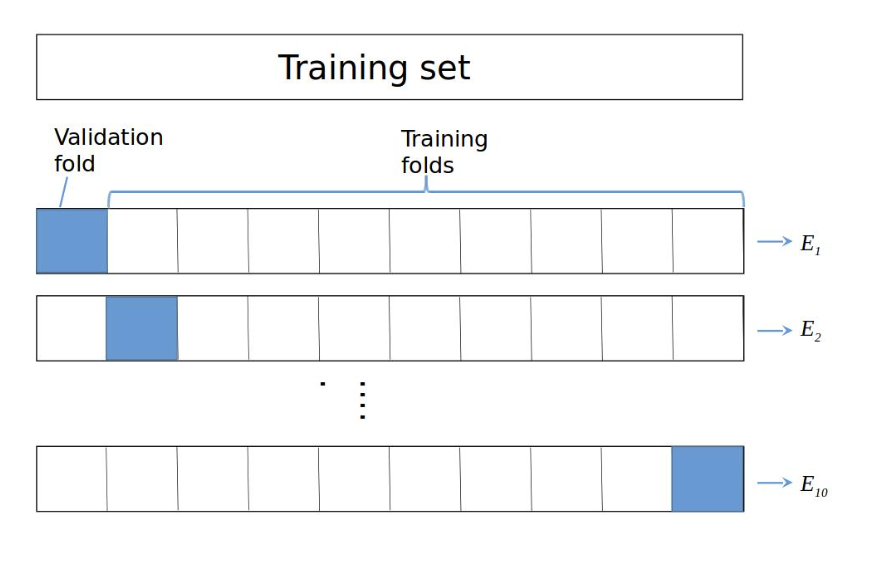


> ### Diagnose Variance Problems
- If $\hat{f}$ suffers from **high variance** : 
  - **CV error of $\hat{f}$ > training set error of $\hat{f}$.**
- $\hat{f}$ is said to overfit the training set. To remedy overtting:
  - decrease model complexity,
  - for ex: decrease max depth, increase min samples per leaf, ...
  - gather more data, ..
  
> ### Diagnose Bias Problems
- if $\hat{f}$ suffers from **high bias**: 
  - **CV error of $\hat{f} \approx$ training set error of $\hat{f}$ >> desired error.** 
- $\hat{f}$ is said to underfit the training set. To remedy undertting:
  - increase model complexity
  - for ex: increase max depth, decrease min samples per leaf, ...
  - gather more relevant features

In [48]:
SEED = 123 # for reproducibility
X_train_all_auto, X_test_all_auto, y_train_all_auto, y_test_all_auto = train_test_split(X_all_auto, y_mpg_auto, 
                                                                                         test_size=.3, random_state=SEED)
dt_all_auto = DecisionTreeRegressor(max_depth=4, min_samples_leaf=.14, random_state=SEED)

In [49]:
X_train_all_auto.shape

(274, 8)

In [50]:
y_train_all_auto.shape

(274, 1)

In [51]:
X_all_auto.shape

(392, 8)

In [52]:
y_mpg_auto.shape

(392, 1)

call cross_val_score() by passing dt, X_train, y_train; set the parameters cv to 10 for 10-fold-cross-validation and scoring to neg_mean_squared_error to compute the negative-mean-squared-errors. The scoring parameter was set so because cross_val_score() does not allow computing the mean-squared-errors directly. Finally, set n_jobs to -1 to exploit all available CPUs in computation. The result is a numpy-array of the 10 negative mean-squared-errors achieved on the 10-folds. You can multiply the result by minus-one to obtain an array of CV-MSE. 

In [53]:
MSE_CV_auto = - cross_val_score(dt_all_auto, X_train_all_auto, y_train_all_auto, 
                               cv=10, scoring="neg_mean_squared_error", n_jobs=-1)
MSE_CV_auto

array([15.54323825, 26.28799841, 26.15867241, 21.28717936, 10.79606455,
       15.89493937, 30.45480138,  8.55974761, 26.31328484, 23.76098449])

In [60]:
dt_all_auto.fit(X_train_all_auto, y_train_all_auto)

y_pred_train_auto = dt_all_auto.predict(X_train_all_auto)
y_pred_test_auto = dt_all_auto.predict(X_test_all_auto)

The **CV-mean-squared-error** can be determined as the mean of MSE_CV. 

Use the function MSE to evaluate train & test set mean-squared-errors. 

Given that the **training set error** is smaller than the **CV-error**, we can deduce that dt **overfits** the training set and that it suffers from **high variance**. 
  - (because if **CV error of $\hat{f}$ > training set error of $\hat{f}$** our model hsd high var issue)
  

Notice how the CV and test set errors are roughly equal.



In [61]:
print(f"CV MSE: {MSE_CV_auto.mean():.2f}")

CV MSE: 20.51


In [62]:
print(f"RMSE: {MSE_CV_auto.mean()**(1/2):.2f}")

RMSE: 4.53


In [63]:
print(f"Train MSE: {MSE(y_train_all_auto, y_pred_train_auto):.2f}")

Train MSE: 15.30


In [64]:
print(f"Train RMSE: {MSE(y_train_all_auto, y_pred_train_auto)**(1/2):.2f}")

Train RMSE: 3.91


In [65]:
print(f"Test MSE: {MSE(y_test_all_auto, y_pred_test_auto):.2f}")

Test MSE: 20.92


### Instantiate the model

We'll diagnose the bias and variance problems of a regression tree. The regression tree we'll define will be used to predict the mpg consumption of cars from the auto dataset using all available features.

> Note:since `cross_val_score` has only the option of evaluating the negative MSEs, its output should be multiplied by negative one to obtain the MSEs. The CV RMSE can then be obtained by computing the square root of the average MSE.

A very good practice is to keep the test set untouched until you are confident about your model's performance. CV is a great technique to get an estimate of a model's performance without affecting the test set.

## Ensemble Learning

> ### Advantages of CARTs
- Simple to understand.
- Simple to interpret.
- Easy to use.
- Flexibility: ability to describe non-linear dependencies.
- Preprocessing: no need to standardize or normalize features, ...

> ### Limitations of CARTs
- **Classication**: can only produce orthogonal decision boundaries.
- Sensitive to small variations in the training set.
- **High variance**: unconstrained CARTs may overfit the training set.
- **Solution**: ensemble learning.

> ### Ensemble Learning
- Train different models on the same dataset.
- Let each model make its predictions.
- **Meta-model**: aggregates predictions of individual models.
- **Final prediction**: more robust and less prone to errors.
- **Best results**: models are skillful in different ways.

> ### Ensemble Learning: A Visual Explanation

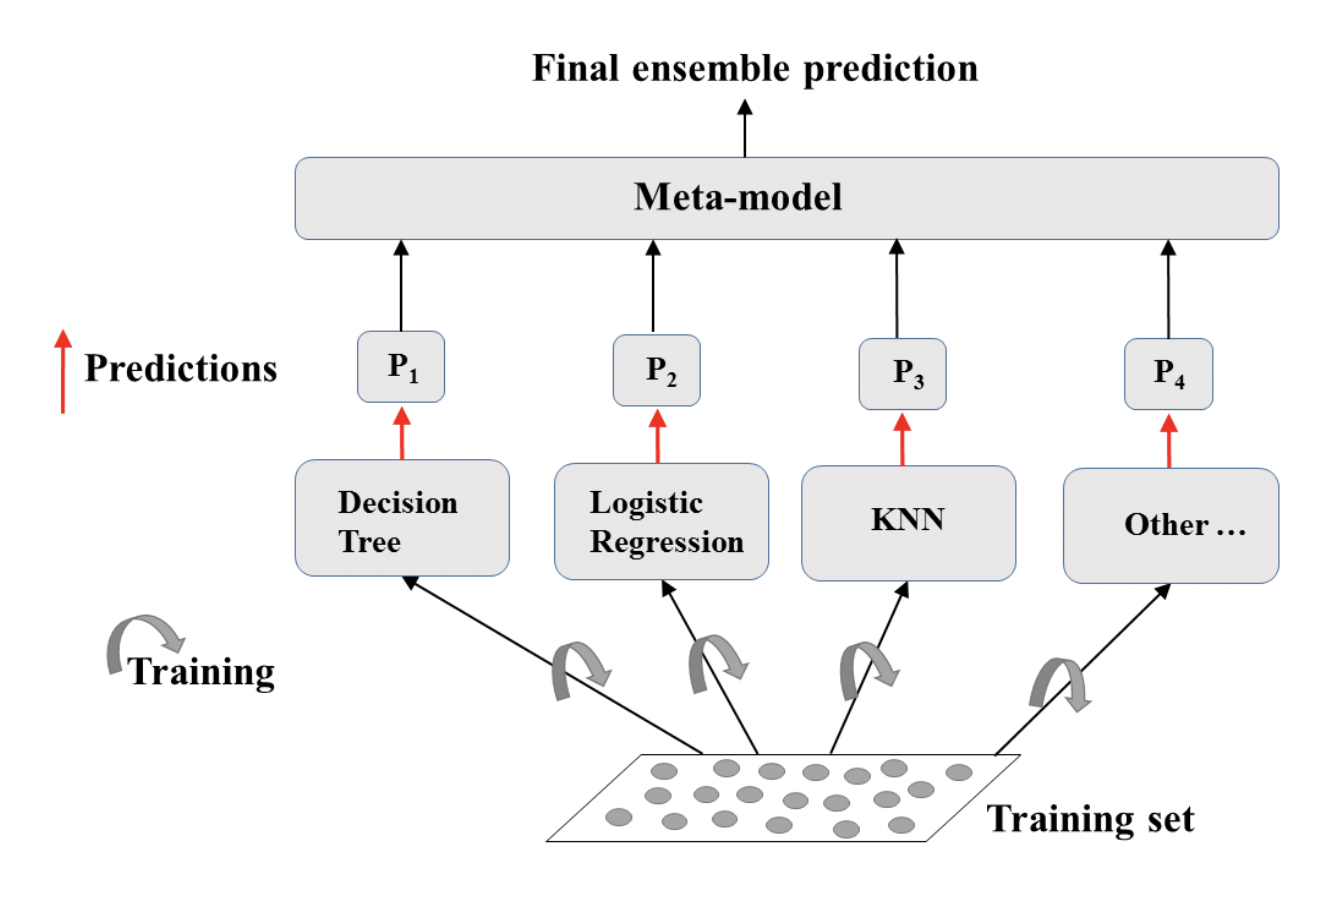




> ### Ensemble Learning in Practice: Voting Classier
- Binary classication task.
- N classiers make predictions: $P_1, P_2, ..., P_N$ with $P_i$ = 0 or 1.
- **Meta-model prediction**: hard voting.

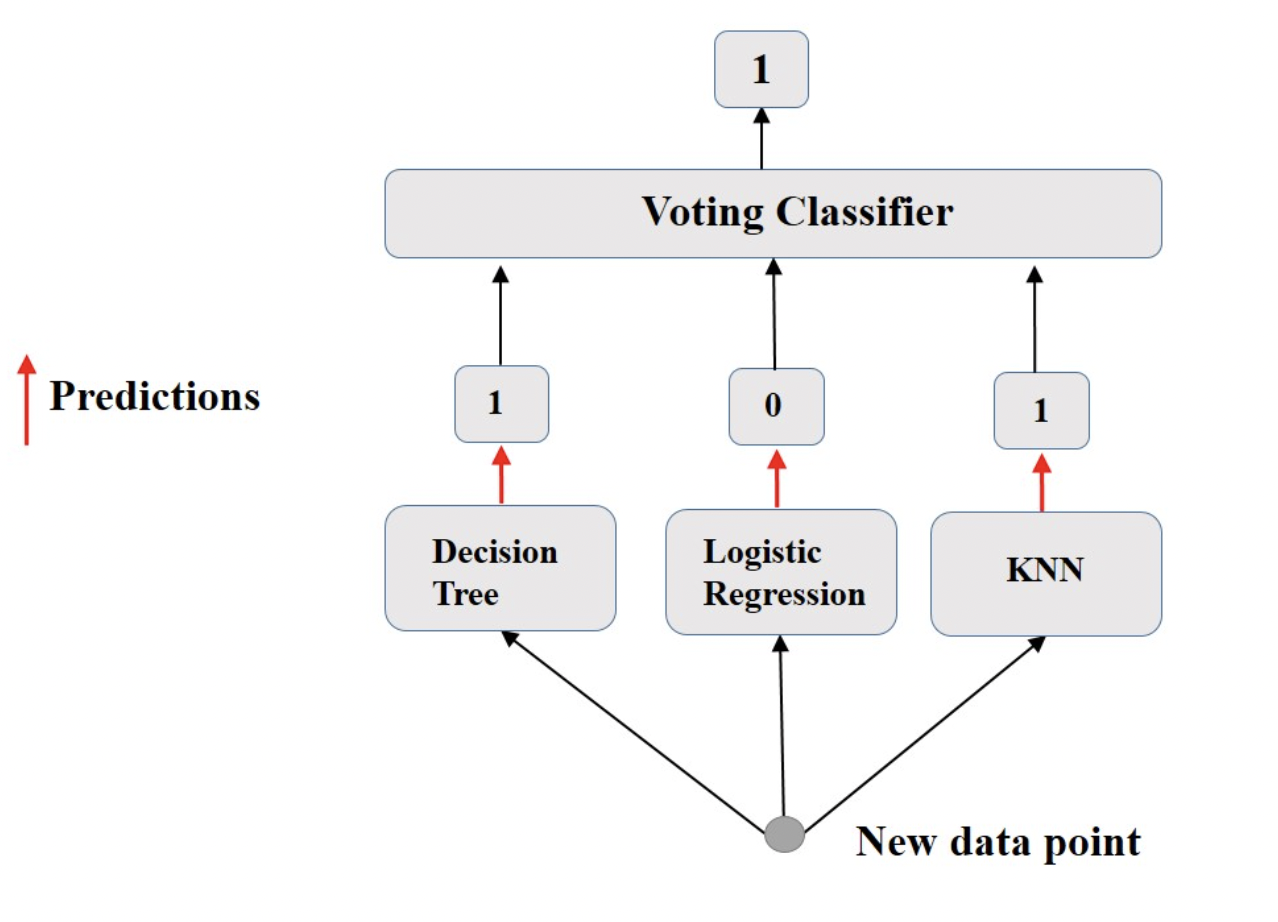

> ### Voting Classier in sklearn (Breast-Cancer dataset)


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Import models, including VotingClassifier meta-model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier


In [66]:
SEED = 1 # for reproducibility
X_train_all_wbc, X_test_all_wbc, y_train_all_wbc, y_test_all_wbc = train_test_split(X_all_wbc, y_wbc, 
                                                                                    test_size=.3, 
                                                                                    random_state=SEED)
# Instantiate individual Classifier
logreg_wbc = LogisticRegression(random_state=SEED)
knn_wbc = KNN()
dt_wbc = DecisionTreeClassifier(random_state=SEED)
classifiers = [('Logistic Regression', logreg_wbc), 
               ('K Nearest Neighbors', knn_wbc), 
               ("Classification Tree", dt_wbc)]

for classifier,clf in classifiers:
    clf.fit(X_train_all_wbc, y_train_all_wbc)
    y_pred_wbc = clf.predict(X_test_all_wbc)
    print(f"{classifier:s} : {accuracy_score(y_test_all_wbc, y_pred_wbc):.3f}")
    
    

Logistic Regression : 0.930
K Nearest Neighbors : 0.930
Classification Tree : 0.930


In [67]:
vc_wbc = VotingClassifier(estimators=classifiers)

vc_wbc.fit(X_train_all_wbc, y_train_all_wbc)
y_pred_wbc = vc_wbc.predict(X_test_all_wbc)

print(f"Voting Classifier: {accuracy_score(y_test_all_wbc, y_pred_wbc):.3f}")



Voting Classifier: 0.953


Fitting vc to the training set yields a test set accuracy of 95%. This accuracy is higher than that achieved by any of the individual models in the ensemble.

### Define the ensemble

We'll work with the [Indian Liver Patient Dataset](https://www.kaggle.com/jeevannagaraj/indian-liver-patient-dataset) from the UCI Machine learning repository.

We'll instantiate three classifiers to predict whether a patient suffers from a liver disease using all the features present in the dataset.

In [68]:
pd.read_csv("datasets/indian_liver_patient.csv").head()

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   
3   58    Male              1.0               0.4                   182   
4   72    Male              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  
0      3.3                        0.90        1  
1      3.2                        0.74        1  
2      3.3                        0.89        1  
3      3.4                        1.00        1  
4      2.4                        0.40        1

In [69]:
pd.read_csv("datasets/indian_liver_patient_preprocessed.csv").head()

Unnamed: 0   Age_std  Total_Bilirubin_std  Direct_Bilirubin_std  \
0           0  1.247403            -0.420320             -0.495414   
1           1  1.062306             1.218936              1.423518   
2           2  1.062306             0.640375              0.926017   
3           3  0.815511            -0.372106             -0.388807   
4           4  1.679294             0.093956              0.179766   

   Alkaline_Phosphotase_std  Alamine_Aminotransferase_std  \
0                 -0.428870                     -0.355832   
1                  1.675083                     -0.093573   
2                  0.816243                     -0.115428   
3                 -0.449416                     -0.366760   
4                 -0.395996                     -0.295731   

   Aspartate_Aminotransferase_std  Total_Protiens_std  Albumin_std  \
0                       -0.319111            0.293722     0.203446   
1                       -0.035962            0.939655     0.077462   
2                       -0.146459            0.478274     0.203446   
3                       -0.312205            0.293722     0.329431   
4                       -0.177537            0.755102    -0.930414   

   Albumin_and_Globulin_Ratio_std  Is_male_std  Liver_disease  
0                       -0.147390            0              1  
1                       -0.648461            1              1  
2                       -0.178707            1              1  
3                        0.165780            1              1  
4                       -1.713237            1              1

In [70]:
# Set seed for reproducibility
SEED=1

# Instantiate lr
lr_ilp = LogisticRegression(random_state=SEED)

# Instantiate knn
knn_ilp = KNN(n_neighbors=27)

# Instantiate dt
dt_ilp = DecisionTreeClassifier(min_samples_leaf=.13, random_state=SEED)

# Define the list classifiers
classifiers_ilp = [('Logistic Regression', lr_ilp), 
                   ('K Nearest Neighbours', knn_ilp), 
                   ('Classification Tree', dt_ilp)]

### Evaluate individual classifiers

In [71]:
ilp = pd.read_csv("datasets/indian_liver_patient_preprocessed.csv")
ilp.shape 

(579, 12)

In [72]:
X_ilp = ilp[['Unnamed: 0', 'Age_std', 'Total_Bilirubin_std', 'Direct_Bilirubin_std',
       'Alkaline_Phosphotase_std', 'Alamine_Aminotransferase_std',
       'Aspartate_Aminotransferase_std', 'Total_Protiens_std', 'Albumin_std',
       'Albumin_and_Globulin_Ratio_std', 'Is_male_std']]
y_ilp = ilp.Liver_disease

In [73]:
X_train_ilp, X_test_ilp, y_train_ilp, y_test_ilp = train_test_split(X_ilp, y_ilp, test_size=.3, random_state=SEED)


In [74]:
# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers_ilp:    
 
    # Fit clf to the training set
    clf.fit(X_train_ilp, y_train_ilp)    
   
    # Predict y_pred
    y_pred_ilp = clf.predict(X_test_ilp)
    
    # Calculate accuracy
    accuracy_ilp = accuracy_score(y_test_ilp, y_pred_ilp) 
   
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy_ilp))

Logistic Regression : 0.764
K Nearest Neighbours : 0.724
Classification Tree : 0.730


Logistic Regression achieved the highest accuracy of 76.4%.

### Better performance with a Voting Classifier

We'll evaluate the performance of a voting classifier that takes the outputs of the models defined in the list classifiers and assigns labels by majority voting.

In [75]:
# Instantiate a VotingClassifier vc
vc_ilp = VotingClassifier(estimators=classifiers_ilp)     

# Fit vc to the training set
vc_ilp.fit(X_train_ilp, y_train_ilp)   

# Evaluate the test set predictions
y_pred_ilp = vc_ilp.predict(X_test_ilp)

# Calculate accuracy score
accuracy_ilp = accuracy_score(y_test_ilp, y_pred_ilp)
print('Voting Classifier: {:.3f}'.format(accuracy_ilp))

Voting Classifier: 0.764


# Bagging and Random Forests

Bagging is an ensemble method involving training the same algorithm many times using different subsets sampled from the training data. We'll explore how bagging can be used to create a tree ensemble. We'll also explore how the random forests algorithm can lead to further ensemble diversity through randomization at the level of each split in the trees forming the ensemble.

## Bagging


> ### Ensemble Methods
- Voting Classier
  - same training set,
  - $\neq$ algorithms.
- Bagging
  - one algorithm,
  - $\neq$ subsets of the training set.

> ### Bagging
- **Bagging**: Bootstrap Aggregation.
- Uses a technique known as the bootstrap.
- **Reduces variance** of individual models in the ensemble.




> ### Bootstrap

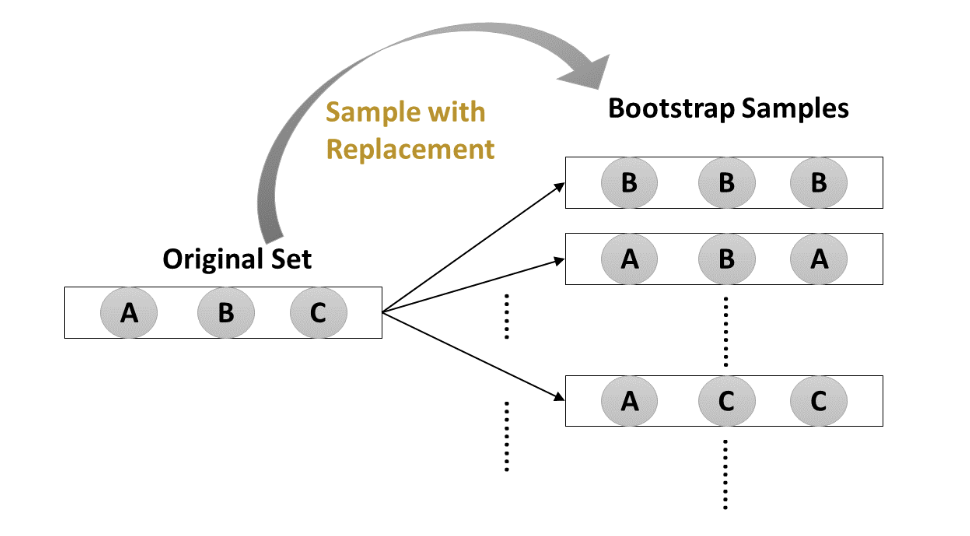


> ### Bagging: Training
![image.png](datasets/bagging-training.png)

> ### Bagging: Prediction
![image.png](datasets/bagging-prediction.png)

> ### Bagging: Classication & Regression
- **Classication**: Aggregates predictions by **majority** voting.
  - `BaggingClassifier` in scikit-learn.


- **Regression**:Aggregates predictions through **averaging**.
  - `BaggingRegressor` in scikit-learn.

> ### Bagging Classier in sklearn (Breast-Cancer dataset)

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split



In [76]:
SEED = 1

In [77]:
X_train_all_wbc, X_test_all_wbc, y_train_all_wbc, y_test_all_wbc = train_test_split(X_wbc, y_wbc, 
                                                                                    stratify=y_wbc, 
                                                                                    random_state=SEED,
                                                                                    test_size=.3
                                                                                   )

In [78]:
dt_wbc = DecisionTreeClassifier(max_depth=4, 
                                min_samples_leaf=.16, 
                                random_state=SEED)
bc_wbc = BaggingClassifier(base_estimator=dt_wbc, 
                           n_estimators=300, 
                           n_jobs=-1)

bc_wbc.fit(X_train_all_wbc, y_train_all_wbc)

y_pred_wbc = bc_wbc.predict(X_test_all_wbc)

accuracy_wbc = accuracy_score(y_test_all_wbc, y_pred_wbc)

print(f"Accuracy of Bagging Classifier: {accuracy_wbc:.3f}")


Accuracy of Bagging Classifier: 0.877


### Define the bagging classifier

We'll work with the Indian Liver Patient dataset from the UCI machine learning repository. The task is to predict whether a patient suffers from a liver disease using 10 features including Albumin, age and gender. We'll do so using a Bagging Classifier.

In [79]:
# Instantiate dt
dt_ilp = DecisionTreeClassifier(random_state=1)

# Instantiate bc
bc_ilp = BaggingClassifier(base_estimator=dt_ilp, 
                           n_estimators=50, 
                           random_state=1)



### Evaluate Bagging performance

Now that We instantiated the bagging classifier, it's time to train it and evaluate its test set accuracy.

In [80]:
ilp2 = pd.read_csv("datasets/indian_liver_patient.csv")
ilp2.shape

(583, 11)

In [82]:
ilp2["Gender"] = ilp2.Gender.map({"Male":1, "Female":0})

In [84]:
ilp2.dropna(inplace=True)

In [86]:
X_ilp2 = ilp2.drop("Dataset", axis=1)
y_ilp2 = ilp2.Dataset

In [87]:
X_train_ilp2, X_test_ilp2, y_train_ilp2, y_test_ilp2 = train_test_split(X_ilp2, y_ilp2, test_size=.2, random_state=1)

In [88]:
# Fit bc to the training set
bc_ilp.fit(X_train_ilp2, y_train_ilp2)

# Predict test set labels
y_pred_ilp = bc_ilp.predict(X_test_ilp2)

# Evaluate acc_test
acc_test_ilp = accuracy_score(y_test_ilp2, y_pred_ilp)
print('Test set accuracy of bc: {:.2f}'.format(acc_test_ilp)) 

Test set accuracy of bc: 0.71


## Out of Bag Evaluation

> ### Bagging
- some instances may be sampled several times for one model,
- other instances may not be sampled at all.


> ### Out Of Bag (OOB) instances
- On average, for each model, 63% of the training instances are sampled.
- The remaining 37% constitute the OOB instances.

> ### OOB Evaluation

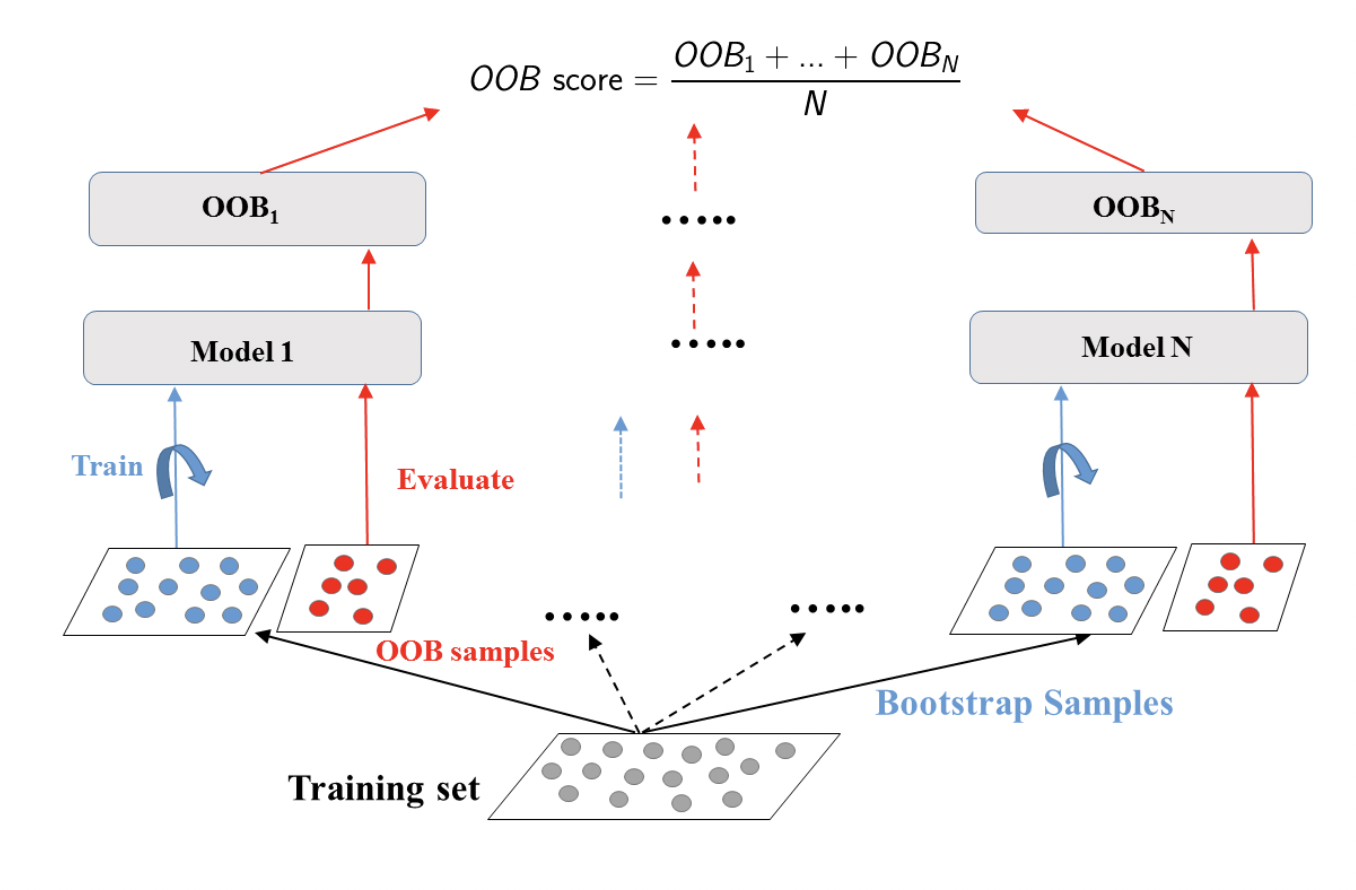


> ### OOB Evaluation in sklearn (Breast CancerDataset)

In [ ]:
dt = DecisionTreeClassifier(max_depth=4,
                            min_samples_leaf=0.16,
                            random_state=SEED)


In [89]:
bc_wbc = BaggingClassifier(base_estimator=dt_wbc, 
                           n_estimators=300, 
                           oob_score=True, 
                           n_jobs=-1)

bc_wbc.fit(X_train_all_wbc, y_train_all_wbc)
y_pred_wbc = bc_wbc.predict(X_test_all_wbc)
y_pred_wbc[:5]

array([0, 0, 1, 0, 0], dtype=int64)

In [90]:
test_accuracy_wbc = accuracy_score(y_test_all_wbc, y_pred_wbc)

oob_accuracy_wbc = bc_wbc.oob_score_

print(f"Test Accurary {test_accuracy_wbc:.3f}")
print(f"OOB Accuracy {oob_accuracy_wbc:.3f}")

Test Accurary 0.877
OOB Accuracy 0.915


### Note that OOB-score corresponds to the accuracy for classifiers and the r-squared score for regressors. 

### Prepare the ground

We'll compare the OOB accuracy to the test set accuracy of a bagging classifier trained on the Indian Liver Patient dataset.

In sklearn, you can evaluate the OOB accuracy of an ensemble classifier by setting the parameter `oob_score` to True during instantiation. After training the classifier, the OOB accuracy can be obtained by accessing the `.oob_score_` attribute from the corresponding instance.

In [91]:
# Instantiate dt
dt_ilp = DecisionTreeClassifier(min_samples_leaf=8, 
                                random_state=1)

# Instantiate bc
bc_ilp = BaggingClassifier(base_estimator=dt_ilp, 
            n_estimators=50,
            oob_score=True,
            random_state=1)

### OOB Score vs Test Set Score

We will fit it to the training set and evaluate its test set and OOB accuracies.

In [92]:
# Fit bc to the training set 
bc_ilp.fit(X_train_ilp2, y_train_ilp2)

# Predict test set labels
y_pred_ilp = bc_ilp.predict(X_test_ilp2)

# Evaluate test set accuracy
acc_test_ilp = accuracy_score(y_test_ilp2, y_pred_ilp)

# Evaluate OOB accuracy
acc_oob_ilp = bc_ilp.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test_ilp, acc_oob_ilp))


Test set accuracy: 0.690, OOB accuracy: 0.680


The test set accuracy and the OOB accuracy of bc are both roughly equal to 70%!

## Random Forests (RF)

> ### Recall: Bagging
- **Base estimator**: can be any model, eg. Decision Tree, Logistic Regression, Neural Net, ...
- Each estimator is trained on a distinct bootstrap sample of the training set
- Estimators use all features for training and prediction

> ### Further Diversity with Random Forests
- **Base estimator**: Decision Tree
- Each estimator is trained on a different bootstrap sample having the same size as the training set
- RF introduces further randomization in the training of individual trees
- $d$ features are sampled at each node without replacement( %d%<total number of features )



> ### Random Forests: Training
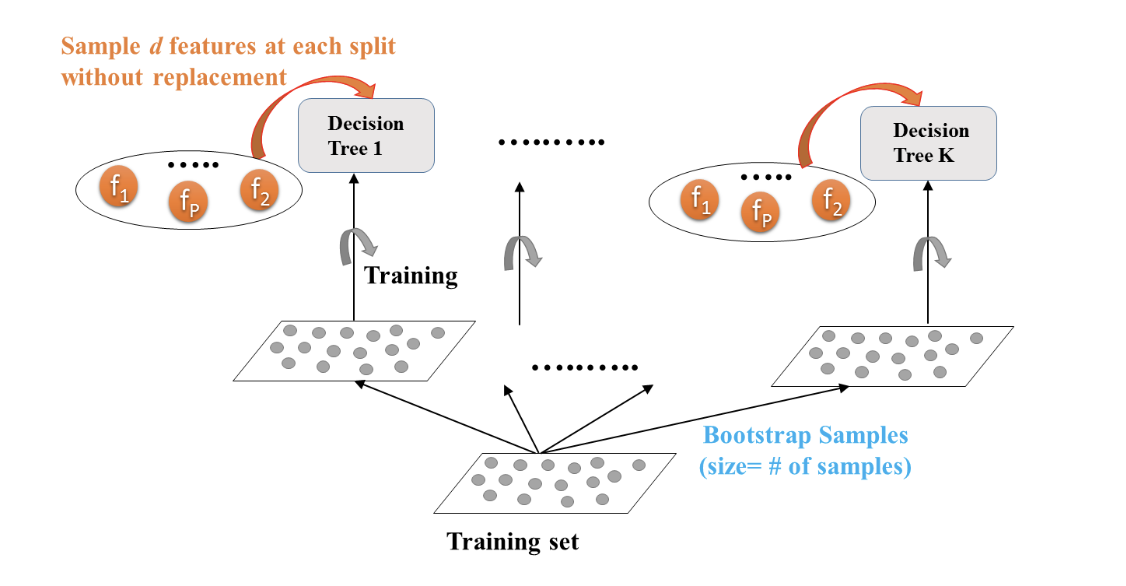

  At each node, only d features are sampled from all features without replacement. The node is then split using the sampled feature that maximizes information gain. In scikit-learn d defaults to the square-root of the number of features. For example, if there are 100 features, only 10 features are sampled at each node.



> ### Random Forests: Prediction
![image.png](datasets/rf-prediction.png)

> ### Random Forests: Classication & Regression
- **Classification**:Aggregates predictions by majority voting
  - `RandomForestClassifier` in scikit-learn
  
  
- **Regression**:Aggregates predictions through averaging 
  - `RandomForestRegressor` in scikit-learn
> ### In general, Random Forests achieves a lower variance than individual trees.


> ### Random Forests Regressor in sklearn (autodataset)

In [ ]:
X_train_auto, X_test_auto, y_train_auto, y_test_auto = train_test_split(X_all_auto, 
                                                                        y_mpg_auto, 
                                                                       test_size=.3, 
                                                                        random_state=SEED)
rf_auto = RandomForestRegressor(n_estimators=400, 
                                min_samples_leaf=.12, 
                                random_state=SEED)
rf_auto.fit(X_train_auto, y_train_auto)

y_pred_auto = rf_auto.predict(X_test_auto)

rmse_test_auto = MSE(y_test_auto, y_pred_auto)**(1/2)

print(f"Test set RMSE of rf {rmse_test_auto:.3f}")

Test set RMSE of rf 3.978


This error is smaller than that achieved by a single regression tree which is 4.43.

> ### Feature Importance
- **Tree-based methods**: enable measuring the importance of each feature in prediction.
- In `sklearn`:
  - how much the tree nodes use a particular feature (weighted average) to reduce impurity
  - accessed using the attribute `feature_importance_`
  
> ### Feature Importance in sklearn


In [93]:
SEED

1

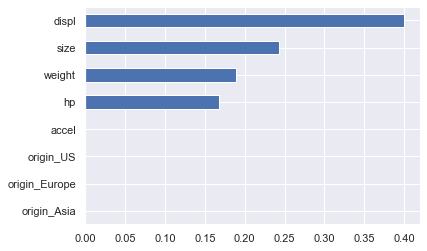

In [95]:
importances_rf = pd.Series(rf_auto.feature_importances_, 
                                index=X_all_auto.columns)
importances_rf_auto = importances_rf.sort_values()

importances_rf_auto.plot(kind='barh')
plt.show()


### Train an RF regressor

We'll predict bike rental demand in the Capital Bikeshare program in Washington, D.C using historical weather data from the [Bike Sharing Demand dataset](https://www.kaggle.com/c/bike-sharing-demand) available through Kaggle. For this purpose, we will be using the random forests algorithm. As a first step, we'll define a random forests regressor and fit it to the training set.

In [96]:
bikes = pd.read_csv("datasets/bikes.csv")
bikes.head()

hr  holiday  workingday  temp   hum  windspeed  cnt  instant  mnth  yr  \
0   0        0           0  0.76  0.66     0.0000  149    13004     7   1   
1   1        0           0  0.74  0.70     0.1343   93    13005     7   1   
2   2        0           0  0.72  0.74     0.0896   90    13006     7   1   
3   3        0           0  0.72  0.84     0.1343   33    13007     7   1   
4   4        0           0  0.70  0.79     0.1940    4    13008     7   1   

   Clear to partly cloudy  Light Precipitation  Misty  
0                       1                    0      0  
1                       1                    0      0  
2                       1                    0      0  
3                       1                    0      0  
4                       1                    0      0

In [97]:
bikes.shape

(1488, 13)

In [98]:
X_bikes = bikes.drop("cnt", axis=1)
y_bikes = bikes.cnt

In [99]:
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_bikes, 
                                                            y_bikes, test_size=.2, 
                                                            random_state=2)

# Instantiate rf
rf_b = RandomForestRegressor(n_estimators=25,
                             random_state=2)
            
# Fit rf to the training set    
rf_b.fit(X_train_b, y_train_b) 


RandomForestRegressor(n_estimators=25, random_state=2)

### Evaluate the RF regressor

We'll now evaluate the test set RMSE of the random forests regressor rf

In [100]:
# Predict the test set labels
y_pred_b = rf_b.predict(X_test_b)

# Evaluate the test set RMSE
rmse_test_b = MSE(y_test_b, y_pred_b)**(1/2)

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test_b))

Test set RMSE of rf: 54.49


### Visualizing features importances

We'll determine which features were the most predictive according to the random forests regressor rf

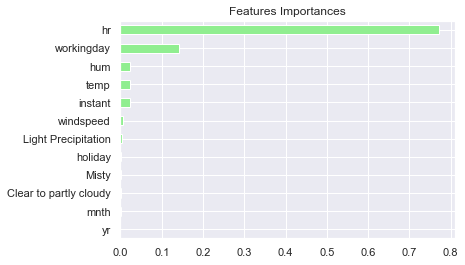

In [101]:
# Create a pd.Series of features importances
importances_b = pd.Series(data=rf_b.feature_importances_,
                        index= X_train_b.columns)

# Sort importances
importances_sorted_b = importances_b.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted_b.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

hr and workingday are the most important features according to rf. The importances of these two features add up to more than 90%!

# Boosting

Boosting refers to an **ensemble method** in which **several models** are trained sequentially with each model learning from the errors of its predecessors. 

We'll be exploring to the two boosting methods of AdaBoost and Gradient Boosting.

## Adaboost

> ### Boosting
- **Boosting**: Ensemble method combining several weak learners to form a strong learner.
- **Weak learner**: Model doing slightly better than random guessing.
- **Example of weak learner**: a decision tree with a maximum-depth of one, known as a decision-stump, is a weak learner. [Decision stump (CART whose maximum depth is 1).]

> ### Boosting
- Train an ensemble of predictors sequentially.
- Each predictor tries to correct its predecessor.
- Most popular boosting methods:
  - AdaBoost,
  - Gradient Boosting.

> ### Adaboost
- Stands for **Ad**aptive **Boost**ing.
- Each predictor pays more attention to the instances wrongly predicted by its predecessor.
- Achieved by changing the weights of training instances.
- Each predictor is assigned a coefcient $\alpha$.
- $\alpha$ depends on the predictor's training error.



> ### AdaBoost: Training
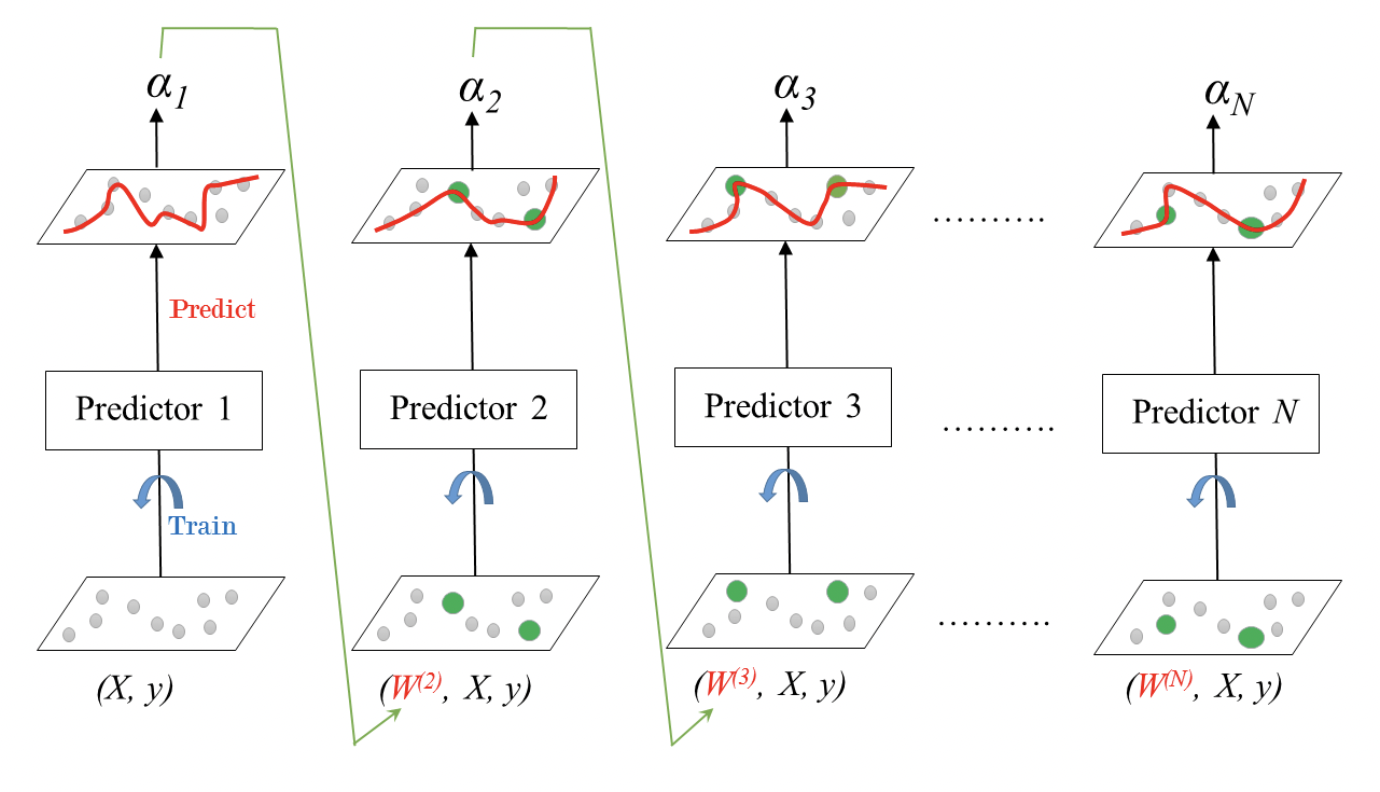

There are N predictors in total. First, predictor1 is trained on the initial dataset (X,y), and the training error for predictor1 is determined. This error can then be used to determine alpha1 which is predictor1's coefficient. Alpha1 is then used to determine the weights W(2) of the training instances for predictor2. 

Notice how the incorrectly predicted instances shown in green acquire higher weights. When the weighted instances are used to train predictor2, this predictor is forced to pay more attention to the incorrectly predicted instances. This process is repeated sequentially, until the N predictors forming the ensemble are trained.




> ### Learning Rate
- Learningrate: $0<η≤1$
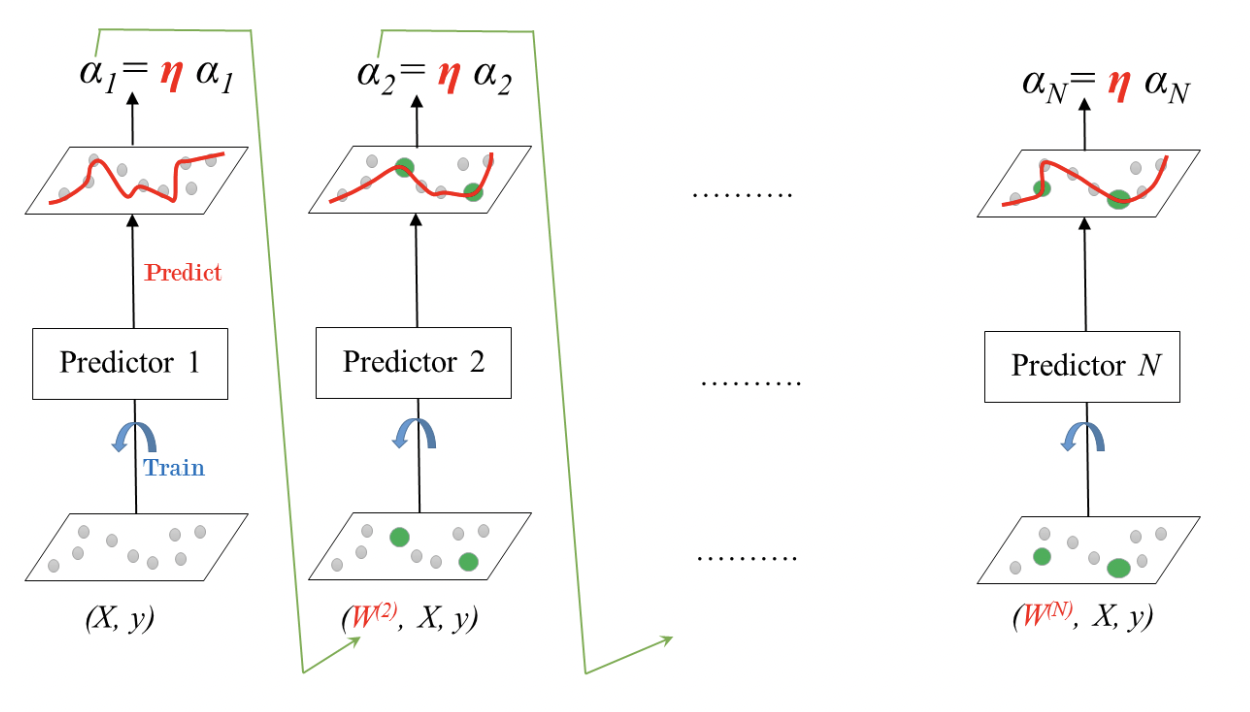

An important parameter used in training is the learning rate, **eta**. Eta is a number between 0 and 1; it is used to shrink the coefficient alpha of a trained predictor. 

It's important to note that there's a trade-off between eta and the number of estimators. A smaller value of eta should be compensated by a greater number of estimators.


> ### AdaBoost: Prediction
- **Classication**: Weighted majority voting.
  - In sklearn: `AdaBoostClassifier`.
- **Regression**:Weighted average.
  - In sklearn: `AdaBoostRegressor`.

> ### AdaBoost Classication 
(Breast Cancer dataset)
- Evaluate AdaBoost with ROC AUC score.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split



In [102]:
SEED

1

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    stratify=y,
                                                    random_state=SEED)



In [103]:
# Instantiate a classification-tree 'dt'
dt_wbc = DecisionTreeClassifier(max_depth=SEED, 
                                random_state=SEED)

# Instantiate an AdaBoost classifier 'adab_clf'
adb_clf_wbc = AdaBoostClassifier(base_estimator=dt_wbc, 
                                 n_estimators=100)

adb_clf_wbc.fit(X_train_all_wbc, y_train_all_wbc)

# Predict the test set probabilities of positive class
y_pred_proba_wbc = adb_clf_wbc.predict_proba(X_test_all_wbc)[:,1]

# Evaluate test-set roc_auc_score
adb_clf_rac_wbc = roc_auc_score(y_test_all_wbc, y_pred_proba_wbc)

print(f"ROC AUC score: {adb_clf_rac_wbc:.2f}")

ROC AUC score: 0.96


### Define the AdaBoost classifier

We'll revisit the Indian Liver Patient dataset. our task is to predict whether a patient suffers from a liver disease using 10 features including Albumin, age and gender. However, this time, we'll be training an AdaBoost ensemble to perform the classification task. In addition, given that this dataset is imbalanced, we'll be using the ROC AUC score as a metric instead of accuracy.

In [104]:
# Instantiate dt
dt_ilp = DecisionTreeClassifier(max_depth=2, random_state=1)

# Instantiate ada
ada_ilp = AdaBoostClassifier(base_estimator=dt_ilp, n_estimators=180, random_state=1)

### Train the AdaBoost classifier

We will also predict the probabilities of obtaining the positive class in the test set

In [105]:
# Fit ada to the training set
ada_ilp.fit(X_train_ilp2, y_train_ilp2)

# Compute the probabilities of obtaining the positive class
y_pred_proba_ilp = ada_ilp.predict_proba(X_test_ilp2)[:,1]

### Evaluate the AdaBoost classifier

 it's time to evaluate ada's ROC AUC score. The ROC AUC score of a binary classifier can be determined using the `roc_auc_score()` function from `sklearn.metrics`.

In [106]:
# Evaluate test-set roc_auc_score
ada_roc_auc_ilp = roc_auc_score(y_test_ilp2, y_pred_proba_ilp)

# Print roc_auc_score
print('ROC AUC score: {:.2f}'.format(ada_roc_auc_ilp))

ROC AUC score: 0.63


## Gradient Boosting (GB)

> ### Gradient Boosted Trees
- Sequential correction of predecessor's errors.
- Does not tweak the weights of training instances.
- Fit each predictor is trained using its predecessor's residual errors as labels.
- **Gradient Boosted Trees**: a CART is used as a base learner.

> ### Gradient Boosted Trees for Regression: Training
![image.png](datasets/gb-training.png)

> ### Shrinkage
![image.png](datasets/gb-shrinkage.png)

> ### Gradient Boosted Trees: Prediction
- **Regression**:
  - $y_{pred}=y_1+ηr_1+...+ηr_N$
  - In sklearn: `GradientBoostingRegressor`
- **Classication**:
  - In sklearn:`GradientBoostingClassifier`
  
> ### Gradient Boosting in sklearn (auto dataset)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE


In [107]:
SEED

1

In [108]:
gbt_auto = GradientBoostingRegressor(n_estimators=300, 
                                     max_depth=SEED, 
                                     random_state=SEED)
gbt_auto.fit(X_train_auto, y_train_auto)

y_pred_auto = gbt_auto.predict(X_test_auto)

rmse_test_auto = MSE(y_test_auto, y_pred_auto)**(1/2)

print(f"Test set RMSE: {rmse_test_auto:.2f}")

Test set RMSE: 4.01


### Define the GB regressor

We'll now revisit the Bike Sharing Demand dataset that was introduced earlier. Recall that our task is to predict the bike rental demand using historical weather data from the Capital Bikeshare program in Washington, D.C.. For this purpose, we'll be using a gradient boosting regressor.

In [109]:
# Instantiate gb
gb_bike = GradientBoostingRegressor(max_depth=4, 
            n_estimators=200,
            random_state=2)

### Train the GB regressor

In [110]:
# Fit gb to the training set
gb_bike.fit(X_train_b, y_train_b)

# Predict test set labels
y_pred_b = gb_bike.predict(X_test_b)
y_pred_b[:5]

array([185.68329451,  -0.49512835,  97.40038645,  19.36109333,
       286.66696372])

### Evaluate the GB regressor

In [111]:
# Compute MSE
mse_test_b = MSE(y_test_b, y_pred_b)

# Compute RMSE
rmse_test_b = mse_test_b**(.5)

# Print RMSE
print('Test set RMSE of gb: {:.3f}'.format(rmse_test_b))

Test set RMSE of gb: 49.537


## Stochastic Gradient Boosting (SGB)

> ### Gradient Boosting: Cons
- GB involves an exhaustive search procedure.
- Each CART is trained to find the best split points and features.
- May lead to CARTs using the same split points and maybe the same features.

> ### Stochastic Gradient Boosting
- Each tree is trained on a random subset of rows of the training data.
- The sampled instances (40%-80% of the training set) are sampled without replacement.
- Features are sampled (without replacement) when choosing split points.
- **Result**: further ensemble diversity.
- **Effect**: adding further variance to the ensemble of trees.

> ### Stochastic Gradient Boosting: Training
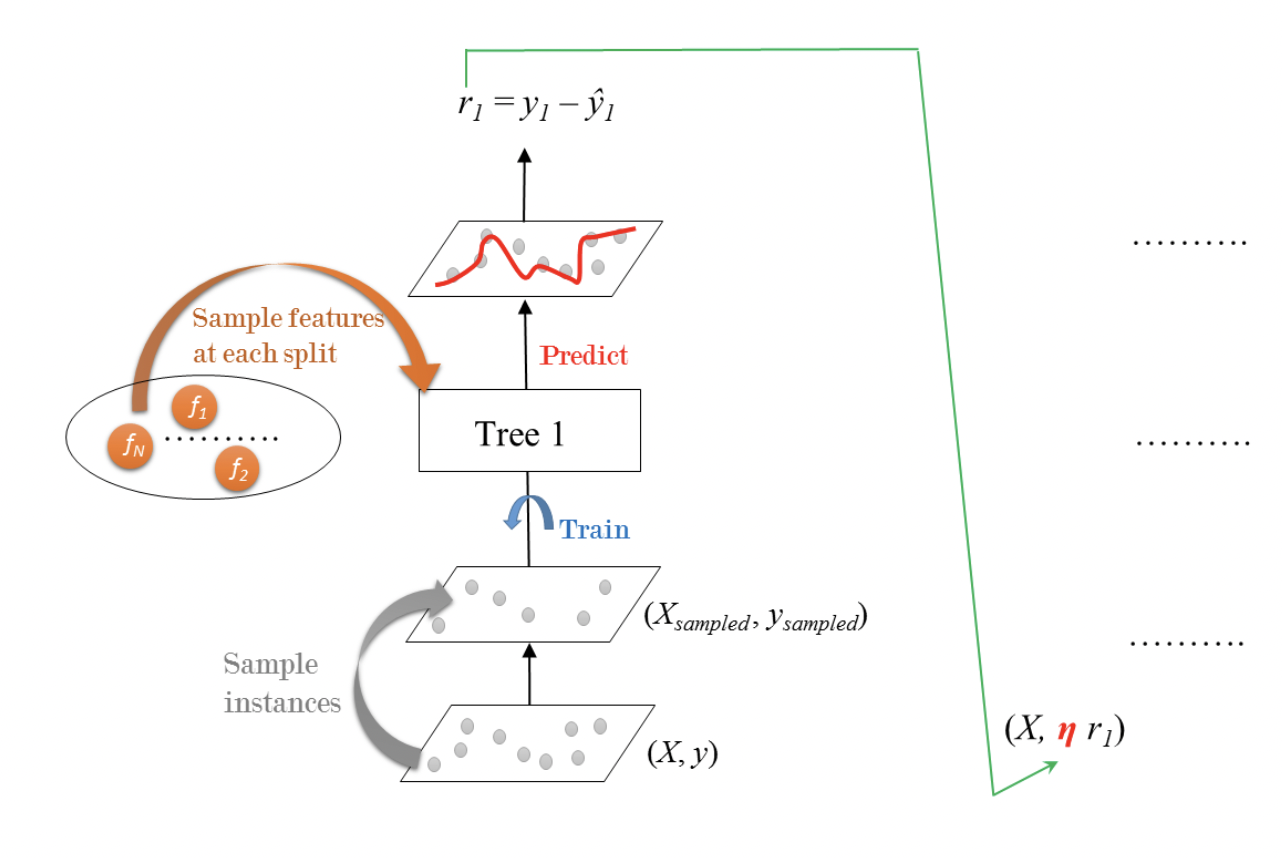
> ### Stochastic Gradient Boosting in sklearn (autodataset)

In [112]:
sgbt_auto = GradientBoostingRegressor(max_depth=1, 
                                      subsample=.8, 
                                      max_features=.2, 
                                      n_estimators=300, 
                                      random_state=SEED)

sgbt_auto.fit(X_train_auto, y_train_auto)

y_pred_auto = sgbt_auto.predict(X_test_auto)

y_pred_auto[:10]


array([32.01622625, 25.94402038, 17.88153661, 16.60490952, 15.53417258,
       25.10604192, 20.77746412, 20.71255904, 21.14278761, 13.11037931])

In [113]:
rmse_test_auto = MSE(y_test_auto, y_pred_auto)**.5
print(f"Test set RMSE: {rmse_test_auto:.2f}")

Test set RMSE: 3.95


### Regression with SGB

We'll be working with the Bike Sharing Demand dataset. We'll solve this bike count regression problem using stochastic gradient boosting.

In [114]:
# Instantiate sgbr
sgbr_b = GradientBoostingRegressor(max_depth=4, 
            subsample=.9,
            max_features=.75,
            n_estimators=200,                                
            random_state=2)

### Train the SGB regressor

In [115]:
# Fit sgbr to the training set
sgbr_b.fit(X_train_b, y_train_b)

# Predict test set labels
y_pred_b = sgbr_b.predict(X_test_b)

### Evaluate the SGB regressor

In [116]:
# Compute test set MSE
mse_test_b = MSE(y_test_b, y_pred_b)

# Compute test set RMSE
rmse_test_b = mse_test_b**.5

# Print rmse_test
print('Test set RMSE of sgbr: {:.3f}'.format(rmse_test_b))

Test set RMSE of sgbr: 47.260


The stochastic gradient boosting regressor achieves a lower test set RMSE than the gradient boosting regressor (which was 52.065)

# Model Tuning

The hyperparameters of a machine learning model are parameters that are not learned from data. They should be set prior to fitting the model to the training set. We'll learn how to tune the hyperparameters of a tree-based model using grid search cross validation.

## Tuning a CART's Hyperparameters

> ### Hyperparameters
- Machine learning model:
  - **parameters**: learned from data
    - CART example: split-point of a node, split-feature of a node, ...
  - **hyperparameters**: not learned from data, set prior to training
    - CART example: `max_depth`, `min_samples_leaf`, splitting criterion ...

> ### What is hyperparameter tuning?
- **Problem**: search for a set of optimal hyperparameters for a learning algorithm.
- **Solution**: find a set of optimal hyperparameters that results in an optimal model.
- **Optimal model**: yields an optimal score.Score: in sklearn defaults to accuracy (classication) and $R^2$ (regression).
- Cross validation is used to estimate the generalization performance.

> ### Why tune hyperparameters?
- In sklearn, a model's default hyperparameters are not optimal for all problems.
- Hyperparameters should be tuned to obtain the best model performance.

> ### Approaches to hyperparameter tuning
- Grid Search
- Random Search
- Bayesian Optimization
- Genetic Algorithms....

> ### Grid search cross validation
- Manually set a grid of discrete hyperparameter values.
- Set a metric for scoring model performance.
- Search exhaustively through the grid.
- For each set of hyperparameters, evaluate each model's CV score.
- The optimal hyperparameters are those of the model achieving the best CV score.

> ### Grid search cross validation: example
- **Hyperparameters grids**:
  - `max_depth` = {2,3,4},
  - `min_samples_leaf` = {0.05, 0.1}
  - hyperparameter space = { (2,0.05) , (2,0.1) , (3,0.05), ... }
  - CV scores = { $score_{(2,0.05)}$,...}
  - optimal hyperparameters = set of hyperparameters corresponding to the best CV score.
  
> ### Inspecting the hyperparameters of a CART insklearn

In [117]:
dt_auto.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 0.1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 3,
 'splitter': 'best'}

In [118]:
dt_wbc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 1,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 1,
 'splitter': 'best'}

In [119]:
dt_wbc = DecisionTreeClassifier(random_state=SEED)
dt_wbc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 1,
 'splitter': 'best'}

In [120]:
params_dt_wbc = {
    'max_depth':[3,4,5,6],
    'min_samples_leaf':[.04, .06, .08],
    'max_features':[.2, .4, .6, .8]
}
grid_dt_wbc = GridSearchCV(estimator=dt_wbc, param_grid=params_dt_wbc, scoring="accuracy", cv=10, n_jobs=-1)
grid_dt_wbc.fit(X_train_wbc, y_train_wbc)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6],
                         'max_features': [0.2, 0.4, 0.6, 0.8],
                         'min_samples_leaf': [0.04, 0.06, 0.08]},
             scoring='accuracy')

> ### Extracting the best hyperparameters

In [121]:
best_hyperparams_wbc = grid_dt_wbc.best_params_
print(f"Best HyperParameters \n{best_hyperparams_wbc}")

Best HyperParameters 
{'max_depth': 3, 'max_features': 0.2, 'min_samples_leaf': 0.06}


In [122]:
best_CV_score_wbc = grid_dt_wbc.best_score_
print(f"Best CV Accuracy: {best_CV_score_wbc}")

Best CV Accuracy: 0.9099999999999999


> ### Extracting the best estimator

In [139]:
best_model_wbc = grid_dt_wbc.best_estimator_
test_acc_wbc = best_model_wbc.score(X_test_wbc, y_test_wbc)
print(f"Test set accuracy of best model {test_acc_wbc:.3f}")

Test set accuracy of best model 0.904


### Tree hyperparameters

We'll revisit the Indian Liver Patient dataset. our task is to tune the hyperparameters of a classification tree. Given that this dataset is imbalanced, we'll be using the ROC AUC score as a metric instead of accuracy.

### Set the tree's hyperparameter grid



In [140]:
dt_ilp.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 1,
 'splitter': 'best'}

In [141]:
dt_ilp = DecisionTreeClassifier(random_state=1)

In [142]:
dt_ilp.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 1,
 'splitter': 'best'}

In [143]:
# Define params_dt
params_dt_ilp = {'max_depth':[2,3,4], 'min_samples_leaf':[.12, .14, .16, .18]}

### Search for the optimal tree
We'll perform grid search using 5-fold cross validation to find dt's optimal hyperparameters.

In [144]:
# Instantiate grid_dt
grid_dt_ilp = GridSearchCV(estimator=dt_ilp,
                       param_grid=params_dt_ilp,
                       scoring="roc_auc",
                       cv=5,
                       n_jobs=-1)

### Evaluate the optimal tree
We'll evaluate the test set ROC AUC score of grid_dt's optimal model. We will first determine the probability of obtaining the positive label for each test set observation. We will use the method `predict_proba()` of an sklearn classifier to compute a 2D array containing the probabilities of the negative and positive class-labels respectively along columns.

In [145]:
grid_dt_ilp.fit(X_train_ilp2, y_train_ilp2)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4],
                         'min_samples_leaf': [0.12, 0.14, 0.16, 0.18]},
             scoring='roc_auc')

In [147]:
# Extract the best estimator
best_model_ilp = grid_dt_ilp.best_estimator_

# Predict the test set probabilities of the positive class
y_pred_proba_ilp = best_model_ilp.predict_proba(X_test_ilp2)[:,1]

# Compute test_roc_auc
test_roc_auc_ilp = roc_auc_score(y_test_ilp2, y_pred_proba_ilp)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc_ilp))

Test set ROC AUC score: 0.731


## Tuning a RF's Hyperparameters

> ### Random Forests Hyperparameters
- CART hyperparameters
- number of estimators
- bootstrap....

> ### Tuning is expensive
- **Hyperparameter tuning**:computationally expensive,
- sometimes leads to very slight improvement,
- Weight the impact of tuning on the whole project.

> ### Inspecting RF Hyperparameters in sklearn

In [148]:
rf_auto = RandomForestRegressor(random_state=SEED)
rf_auto.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [151]:
params_rf_auto = {
    'n_estimators':[300, 400, 500],
    'max_depth':[4,6,8],
    'min_samples_leaf':[.1, .2],
    'max_features':['log2', 'sqrt']
}
grid_rf_auto = GridSearchCV(estimator=rf_auto,
                           param_grid=params_rf_auto, 
                           cv=3,
                           scoring='neg_mean_squared_error',
                           verbose=1,
                           n_jobs=-1)

> ### Searching for the best hyperparameters


In [152]:
grid_rf_auto.fit(X_train_auto, y_train_auto)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   35.7s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  1.6min finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [0.1, 0.2],
                         'n_estimators': [300, 400, 500]},
             scoring='neg_mean_squared_error', verbose=1)

> ### Extracting the best hyperparameters

In [154]:
best_hyperparams_auto = grid_rf_auto.best_params_
print(f"Best HyperParameters\n{best_hyperparams_auto}")

Best HyperParameters
{'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 0.1, 'n_estimators': 500}


> ### Evaluating the best model performance

In [156]:
best_model_auto = grid_rf_auto.best_estimator_
y_pred_auto = best_model_auto.predict(X_test_auto)
rmse_test_auto = MSE(y_test_auto, y_pred_auto)**.5
print(f"Test set RMSE of rf: {rmse_test_auto:.3f}")

Test set RMSE of rf: 3.797


### Random forests hyperparameters



In [157]:
rf_auto = RandomForestRegressor(random_state=2)

### Set the hyperparameter grid of RF

We will be constructing a grid of hyperparameters and tune the number of estimators, the maximum number of features used when splitting each node and the minimum number of samples (or fraction) per leaf.

In [158]:
# Define the dictionary 'params_rf'
params_rf = {
    'n_estimators':[100,350,500],
    'max_features':['log2', 'auto', 'sqrt'],
    'min_samples_leaf':[2, 10, 30]
}

### Search for the optimal forest

> Note: grid search is an exhaustive search process, it may take a lot time to train the model.

In [159]:
# Instantiate grid_rf
grid_rf_auto = GridSearchCV(estimator=rf_auto,
                       param_grid=params_rf_auto,
                       scoring='neg_mean_squared_error',
                       cv=3,
                       verbose=1,
                       n_jobs=-1)
grid_rf_auto.fit(X_train_auto, y_train_auto)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   36.6s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  1.5min finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=2), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [0.1, 0.2],
                         'n_estimators': [300, 400, 500]},
             scoring='neg_mean_squared_error', verbose=1)

### Evaluate the optimal forest

In [160]:
# Extract the best estimator
best_model_auto = grid_rf_auto.best_estimator_

# Predict test set labels
y_pred_auto = best_model_auto.predict(X_test_auto)

# Compute rmse_test
rmse_test_auto = MSE(y_test_auto, y_pred_auto)**.5

# Print rmse_test
print('Test RMSE of best model: {:.3f}'.format(rmse_test_auto)) 

Test RMSE of best model: 3.791
